**SOURCE YOUTUBE :**
- Berjudul : INDONESIA MAKIN DIGITAL - Joko Widodo
https://youtu.be/UMKY_0kiwYk?si=MaVREyqilsjCTWTO


- Video tersebut menunjukkan fokus pada perubahan menuju era digital, yang sering kali terkait dengan **digital transformation.**

- Video tersebut membahas inisiatif program pemerintah, bisnis, atau masyarakat untuk mengadopsi teknologi digital yang merupaakn indikasi **digital transformation.**

#INSTALL LIBRARY

In [52]:
!pip install youtube-comment-downloader
!pip install Sastrawi

#IMPORT ALL LIBRARY

In [53]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

In [54]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#SCRAPPING YOUTUBE COMMENT

In [55]:
# inisialisasi downloader
downloader = YoutubeCommentDownloader()

# video IDs dari 5 video yang di pilih
video_id = "UMKY_0kiwYk"

Menggunakan library 'YoutubeCommentDownloader()' karena :
- Dapat mengambil komentar dari video YouTube berdasarkan video ID.
- Library ini menggunakan pendekatan seperti scroll otomatis untuk mengambil banyak komentar.
- Library ini menggunakan pendekatan seperti scroll otomatis untuk mengambil banyak komentar.

In [56]:
# ambil komentar dari video
comments = downloader.get_comments(video_id)

# Simpan komentar dalam list
all_comments = [comment['text'] for comment in comments]

In [57]:
# simpan data ke dalam file CSV
df = pd.DataFrame(all_comments, columns=["Comment"])
df.to_csv("youtube_comments.csv", index=False)
print("Komentar berhasil disimpan dalam file youtube_comments.csv")

Komentar berhasil disimpan dalam file youtube_comments.csv


#DATA EXPLORATION

INFORMASI DATASET

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  988 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


Dataset terdiri dari 988 entri dan hanya memiliki satu kolom, tidak ada nilai kosong

In [59]:
df.shape

(988, 1)

In [60]:
df['Comment'].nunique()

959

Ini menunjukkan bahwa ada beberapa komentar yang duplikat

In [61]:
df['Comment'].sample(5, random_state=42)

213    Pak jokowi hebat walaupun pak jokowi selalu di...
331      IndiHome masih lemot pak\nJan kalah ama Swasta👍
500    Bismillah \nSemua teori hukum buatan manusia b...
309                                     maju terus pakde
88     Kalau seluruh Indonesia terhubung kereta cepat...
Name: Comment, dtype: object

Isi komentar sebagian besar terlihat bersifat opini atau dukungan

MISSING VALUE

In [62]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom:
Comment    0
dtype: int64


DATA DUPLIKAT

In [63]:
duplicates = df.duplicated().sum()
print(f"Jumlah entri duplikat: {duplicates}")

Jumlah entri duplikat: 29


In [64]:
duplicates_with_original = df[df.duplicated(keep=False)]
print("Data duplikat beserta aslinya:")
print(duplicates_with_original)

Data duplikat beserta aslinya:
                                               Comment
120                                       Semangat pak
141                                        Telkomsel ?
167                                        Telkomsel ?
226                                      Alhamdulillah
276                                        Telkomsel ?
277                                        Telkomsel ?
278                                        Telkomsel ?
299                                        Telkomsel ?
368                                        Telkomsel ?
392                                        Telkomsel ?
413                                        Telkomsel ?
447                                     Indonesia maju
456                                        Telkomsel ?
458                                        Telkomsel ?
479                                        Telkomsel ?
505                                        Telkomsel ?
528                               

STATISTIK PANJANG KOMENTAR

In [65]:
comment_length_stats = df['Comment'].str.len().describe()
print("Distribusi panjang komentar (dalam karakter):")
print(comment_length_stats)

Distribusi panjang komentar (dalam karakter):
count     988.000000
mean      122.076923
std       287.222376
min         1.000000
25%        27.000000
50%        61.500000
75%       140.250000
max      7305.000000
Name: Comment, dtype: float64



Distribusi Panjang Komentar:
- Jumlah komentar: 988
- Rata-rata panjang komentar: 122 karakter
- Standar deviasi: 287 karakter (menunjukkan ada variasi - signifikan dalam panjang komentar).
- Panjang komentar terpendek (min): 1 karakter (mungkin perlu diperiksa untuk validitasnya).
- Panjang komentar terpanjang (max): 7305 karakter (bisa jadi outlier atau komentar yang tidak relevan).
- Kuartil:
1. 25% dari komentar memiliki panjang ≤ 27 karakter.
2. 50% (Median) dari komentar memiliki panjang ≤ 61.5 karakter.
3. 75% dari komentar memiliki panjang ≤ 140.25 karakter.


PERIKSA OUTLIER

In [66]:
long_comments = df[df['Comment'].str.len() > 500]
print(long_comments)

                                               Comment
12   LAPORAN DIDAERAH KP MAKASAR KEC MAKASAR JAKART...
18   Banyak org Jawa di Makassar dan aku akui merek...
22   Maaf pak ini cuman saran jika ada salah salah ...
42   Tanpa mengenal kata lelah\nEngkau presiden Ind...
45   Tetap semangat pak Joko Widodo, tetap membangu...
69   Pak presiden trus integrasikan infrastruktur d...
78   kalau mau lebih maju lagi, hukumnya harus adil...
145  terima kasih pak jokowi,yg udah banyak membang...
156  Keberlemahan Wabah Virus Corona Dan Serta Muta...
169  tolong bpk presiden aplikator2 ojol dipantau t...
171  Makin digital,  tapi kecepatan koneksi interne...
221  Assalamu'alaikum Wr. Wb. \n\nTolong pak presid...
254   @yesayawatuna2428  saya berada di kota yang b...
319  BUKAN INDONESIA LEBIH TEPAT NYA JAKARTA DAN SE...
419  Pak presiden tolong ditindak lanjuti untuk pem...
439  Assalamualaikum Pak presiden tolong ditindak, ...
522  Pak jokowi mesti antisipasi balas dendam orang...
525  Assal

In [67]:
# Filter komentar dengan panjang kurang dari 3 karakter
short_comments = df[df['Comment'].str.len() < 5]
print("Komentar dengan panjang kurang dari 5 karakter:")
print(short_comments)

Komentar dengan panjang kurang dari 5 karakter:
    Comment
3      Kren
52        💘
137       😭
355    🇮🇩🔥💪
365    DMMX
370      👍🏻
483     😍😍😍
625     Hmm
663      ❤🤍
717    Amin
721    👍😍💚🌹
762     ljt
802    Amin
823       🤙
933    Yup!
971    amin
973    Amin


In [68]:
# Filter komentar dengan panjang kurang dari 9 karakter
short_comments = df[df['Comment'].str.len() < 8]
print(short_comments)

     Comment
3       Kren
52         💘
103    Anjay
129   Yntkts
137        😭
355     🇮🇩🔥💪
365     DMMX
370       👍🏻
382   Kerenn
414  5G pakk
483      😍😍😍
561    Nggih
625      Hmm
640    Betul
645   Mantap
663       ❤🤍
686  👍👍🏆🇮🇩🎁🏡
700  Jos pak
713   Mantap
717     Amin
721     👍😍💚🌹
762      ljt
785   ❤️❤️❤️
802     Amin
823        🤙
891  TOP pak
901  Hadirrr
933     Yup!
934    anjay
936  Hi bang
963    🙆❤️🙏👍
971     amin
973     Amin
980   Mantap
984  Pertama
985    First
986   🇮🇩🇮🇩🇮🇩


In [69]:
# Filter komentar dengan panjang kurang dari 10 karakter
short_comments = df[df['Comment'].str.len() < 10]
print(short_comments)

       Comment
3         Kren
11    Slm kren
52           💘
103      Anjay
129     Yntkts
137          😭
148   Pak pres
257  Keren Pak
355       🇮🇩🔥💪
365       DMMX
370         👍🏻
382     Kerenn
400  Jokowi🇮🇩💟
414    5G pakk
424   Keren 🥰🥰
438  3 periode
459   👍👍👍👍👍👍👍👍
483        😍😍😍
559   gg pakde
561      Nggih
625        Hmm
640      Betul
645     Mantap
663         ❤🤍
686    👍👍🏆🇮🇩🎁🏡
700    Jos pak
713     Mantap
717       Amin
721       👍😍💚🌹
762        ljt
785     ❤️❤️❤️
802       Amin
823          🤙
891    TOP pak
899  Bismillah
901    Hadirrr
933       Yup!
934      anjay
936    Hi bang
951  Semat pak
963      🙆❤️🙏👍
969   Mantap👍👍
971       amin
973       Amin
979  Hallo pak
980     Mantap
984    Pertama
985      First
986     🇮🇩🇮🇩🇮🇩


#**A. DATA PREPROCESSING & TEXT REPRESENTATION**

a.
[10%] Lakukan pre processing data dan text representation sebelum melakukan pemodelan unsupervised learning, gunakan minimal 2 text representation approach.

**MENGHAPUS DATA DUPLIKAT YANG DITEMUKAN SEBELUMNYA**

In [70]:
df.drop_duplicates(inplace=True)
print(f"Dataset setelah menghapus duplikat: {df.shape}")

Dataset setelah menghapus duplikat: (959, 1)


In [71]:
duplicates = df.duplicated().sum()
print(f"Jumlah entri duplikat: {duplicates}")

Jumlah entri duplikat: 0


In [72]:
duplicates_with_original = df[df.duplicated(keep=False)]
print("Data duplikat beserta aslinya:")
print(duplicates_with_original)

Data duplikat beserta aslinya:
Empty DataFrame
Columns: [Comment]
Index: []


In [73]:
df.shape

(959, 1)

**MENGHAPUS KOMENTAR PENDEK**

In [74]:
df = df[df['Comment'].str.len() >= 8]

**NORMALISASI PANJANG KOMENTAR**

In [75]:
# Memotong komentar yang terlalu panjang
df['Comment'] = df['Comment'].str[:500]

<ipython-input-75-395161fcdf2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comment'] = df['Comment'].str[:500]


Untuk mengoptimalkan model, disini melakukan pemotongan panjang komentar karena melebihi batas analisis yang realistis. (misalnya, di atas 500-1000 karakter)

##**1. DATA CLEANING**

In [76]:
def cleanse_text(text):
    text = text.lower()  # mengubah teks menjadi lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # menghapus karakter non-huruf dan angka
    text = re.sub(r'[^\w\s]', '', text)  # menghapus simbol dan tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # menghapus spasi berlebih
    return text

# Membersihkan teks langsung di kolom 'Comment'
df['Comment'] = df['Comment'].apply(cleanse_text)

**CEK APAKAH MASIH ADA KARAKTER ANEH**

In [77]:
# Menggabungkan semua teks yang sudah dibersihkan
all_cleaned_text = ' '.join(df['Comment'])

In [78]:
# mendapatkan karakter unik
unique_chars = set(all_cleaned_text)
print("Karakter Unik dalam Data yang Sudah Dibersihkan:")
print(unique_chars)

Karakter Unik dalam Data yang Sudah Dibersihkan:
{'x', 's', 'l', 'z', 't', 'e', 'a', 'h', 'k', 'u', 'r', 'c', 'g', 'f', 'v', 'n', 'w', 'i', 'o', 'j', 'd', 'b', 'm', 'q', 'y', ' ', 'p'}


##**2. Tokeization**

In [79]:
# Tokenisasi langsung pada kolom 'Comment'
df['Comment'] = df['Comment'].apply(word_tokenize)

In [80]:
# df['Comment'] = df['Comment'].apply(lambda x: ' '.join(word_tokenize(x)))

**ANALISIS FREKUENSI KATA**

In [81]:
all_words = [word for tokens in df['Comment'] for word in tokens]
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(50)
print("50 Kata yang Paling Sering Muncul:", most_common_words)

50 Kata yang Paling Sering Muncul: [('pak', 548), ('di', 339), ('indonesia', 298), ('jokowi', 270), ('dan', 249), ('yg', 170), ('presiden', 169), ('yang', 152), ('saya', 150), ('maju', 135), ('bapak', 128), ('bisa', 126), ('untuk', 114), ('sehat', 108), ('digital', 99), ('selalu', 98), ('semoga', 95), ('ini', 93), ('negara', 92), ('dari', 86), ('ada', 83), ('itu', 77), ('kami', 77), ('ke', 68), ('kita', 66), ('internet', 65), ('dengan', 63), ('rakyat', 61), ('tidak', 61), ('nya', 60), ('lebih', 58), ('masih', 54), ('juga', 53), ('terus', 52), ('sudah', 49), ('banyak', 49), ('tolong', 49), ('jaringan', 47), ('semua', 45), ('luar', 44), ('kasih', 42), ('desa', 42), ('akan', 42), ('semangat', 41), ('terima', 41), ('pemerintah', 41), ('biasa', 40), ('karena', 40), ('tapi', 40), ('semakin', 39)]


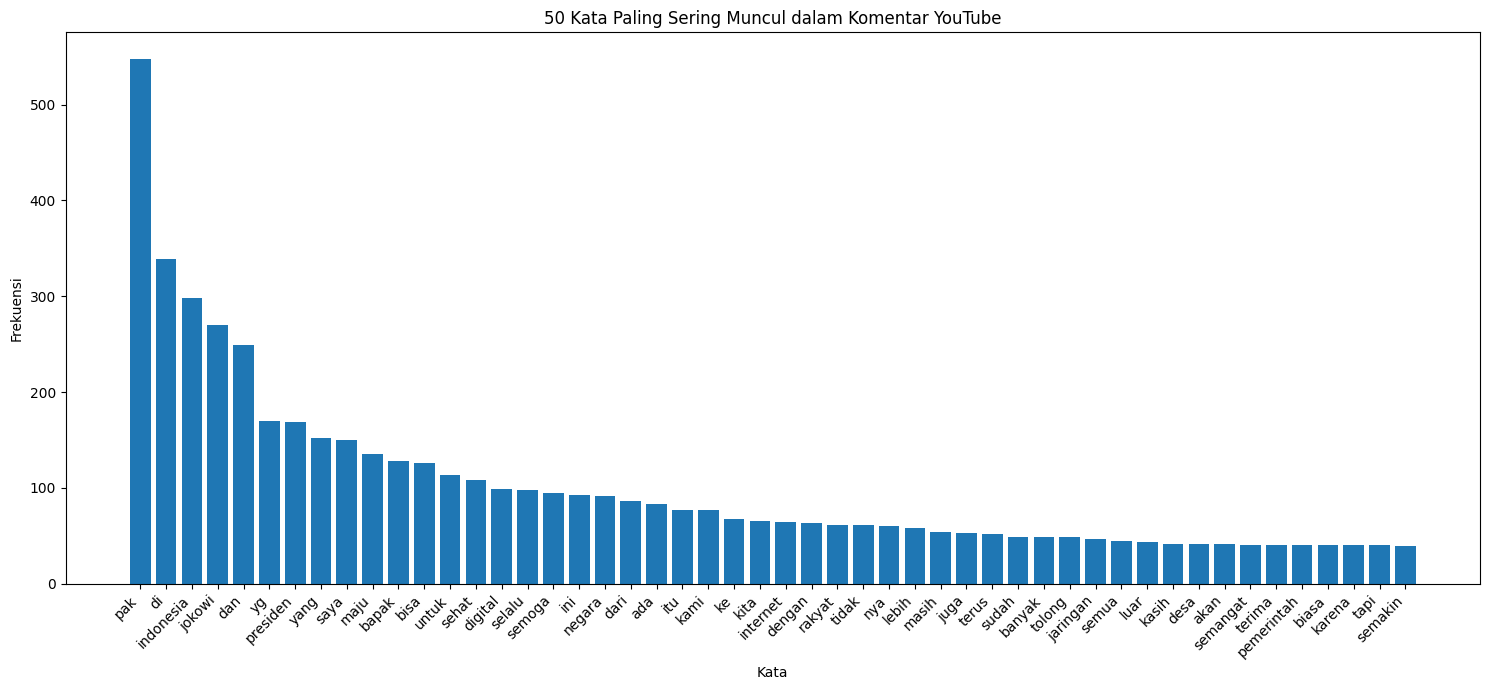

In [82]:
# menggabungkan semua token menjadi satu daftar
all_tokens = [token for tokens in df['Comment'] for token in tokens]

# menghitung frekuensi kata
word_freq = Counter(all_tokens)

# menampilkan 50 kata paling sering
most_common_words = word_freq.most_common(50)
words = [word for word, freq in most_common_words]
frequencies = [freq for word, freq in most_common_words]

# membuat barchart
plt.figure(figsize=(15, 7))
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('50 Kata Paling Sering Muncul dalam Komentar YouTube')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

**Analisis Kata yang Paling Sering Muncul**
1. Kata yang Relevan:
  - Kata-kata seperti **digital, internet, jaringan, desa, pemerintah, maju,** dan **semakin** adalah kata yang relevan dengan tema digital transformasi Indonesia.
  - Kata ini menunjukkan bahwa pembahasannya fokus pada infrastruktur digital dan program pemerintah.

2. Kata Tidak Informatif (Stopwords):
  - Kata-kata seperti **pak, di, dan, yg, yang, itu, kami, dari, nya, dll.,** adalah stopwords (kata umum yang sering muncul tetapi tidak memberikan banyak informasi untuk analisis).
  - Kata-kata seperti **bapak, selalu,** dan **semoga** mungkin menunjukkan sentimen, tetapi perlu evaluasi lebih lanjut apakah perlu dihapus.

3. Kata-Kata Ambigu atau Konteks Tidak Jelas:
  - Kata seperti **bisa, tolong,** dan **masih** memiliki arti yang tergantung pada konteks. Evaluasi lebih lanjut mungkin diperlukan.

##**3. Stop Words & Lemmatize**

> karena tujuan dari remove stopwords adalah untuk menghapus kata-kata umum yang sering muncul dalam teks tetapi tidak memberikan banyak informasi berguna, maka kita akan melist dari analisis kata, mana saja kata yang sering muncul namun tidak memberikan banyak arti.

###**STOPWORDS**

**MANUAL**

In [83]:
# # Menggunakan stopwords bahasa Indonesia
# stop_words = set(stopwords.words('indonesian'))

# # Tambahkan kata stopwords khusus (opsional)
# custom_stopwords = {'pak', 'bapak', 'jokowi', 'yg', 'nya'}
# stop_words.update(custom_stopwords)

# # Hapus stopwords dari token
# df['Comment'] = df['Comment'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

**OTOMATIS**

In [84]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# buat daftar stopwords bawaan Sastrawi
factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

# hapus stopwords dari token
df['Comment'] = df['Comment'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

###**LEMMATIZE**



>Mengubah kata ke bentuk dasarnya untuk konsistensi. Misalnya, "maju", "kemajuan", dan "maju-maju" menjadi "maju".



In [85]:
# inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# terapkan stemming pada token
df['Comment'] = df['Comment'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

###**HANDLING RARE WORDS**



> Menghapus kata-kata yang terlalu jarang muncul dalam dataset. Kata-kata ini biasanya tidak relevan untuk analisis.



In [86]:
# hitung frekuensi kata
word_counts = Counter([word for tokens in df['Comment'] for word in tokens])

# identifikasi kata dengan frekuensi rendah (misalnya, muncul ≤ 2 kali)
rare_words = {word for word, count in word_counts.items() if count <= 2}

# hapus kata-kata langka
df['Comment'] = df['Comment'].apply(lambda tokens: [word for word in tokens if word not in rare_words])

##**ANALISIS FREKUENSI KATA SETELAH PREPROCESSING**

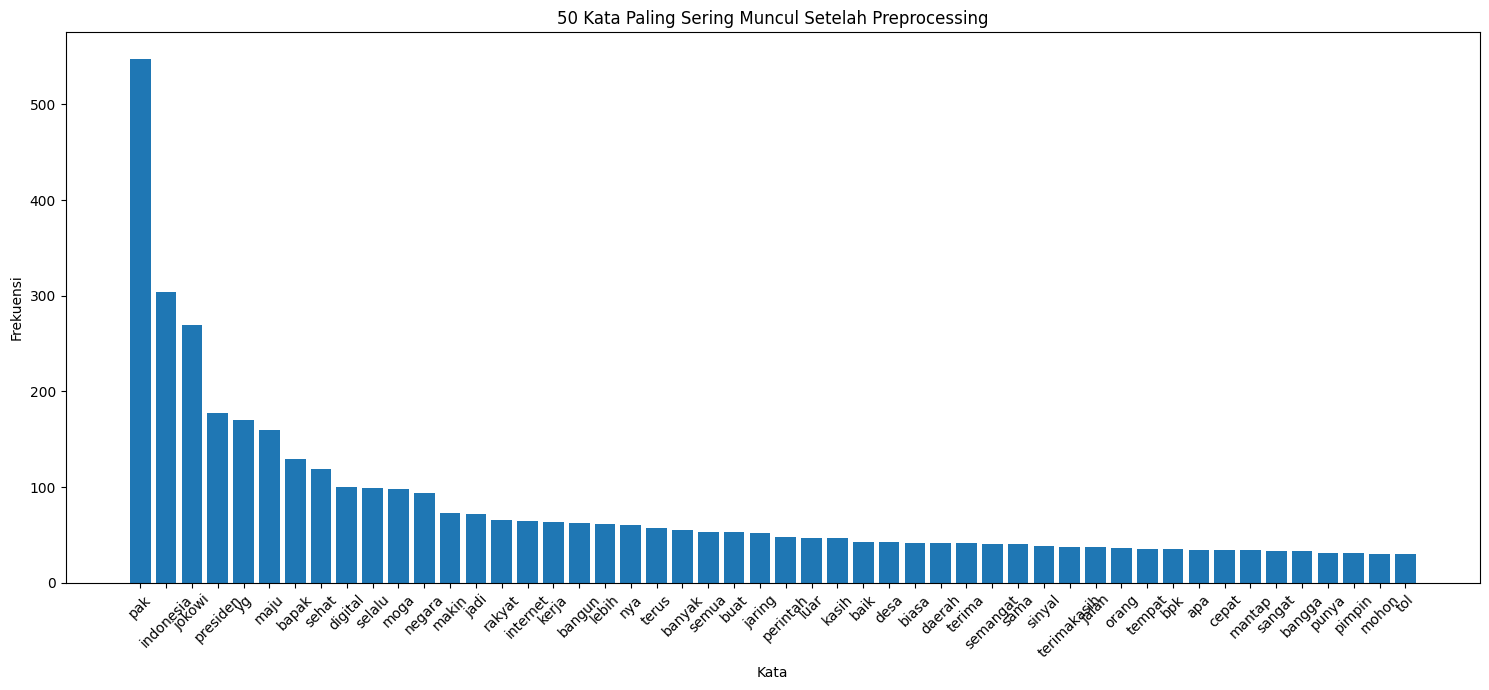

In [87]:
# menggabungkan semua token setelah lemmatization menjadi satu daftar
all_words = [word for tokens in df['Comment'] for word in tokens]

# menghitung frekuensi kata
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(50)

# visualisasi frekuensi kata
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(15, 7))
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('50 Kata Paling Sering Muncul Setelah Preprocessing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Kata yang Perlu Masuk Stopwords dalam Konteks Digital Transformation**
1. **Kata Umum atau Sambung (Tidak Informatif)**:
   - Kata seperti **"pak"**, **"bapak"**, **"jokowi"**, **"presiden"**, dll., tidak relevan untuk analisis langsung tentang **digital transformation** meskipun sering muncul karena video terkait Jokowi.
   - Kata seperti **"nya"**, **"itu"**, **"lagi"**, **"dan"**, **"di"**, **"ke"**, **"yang"**, juga masuk kategori kata yang umum.

2. **Kata Sentimen atau Ungkapan Umum**:
   - Jika tujuan analisis berfokus pada **tema digital transformation**, kata seperti:
     - **"semoga", "selalu", "sehat", "terima kasih"** lebih menggambarkan sentimen atau sopan santun.
     - Ini bisa dihapus karena tidak menambah wawasan tentang topik.

3. **Kata Terkait Digital yang Tetap Dipertahankan**:
   - Kata seperti **"digital"**, **"internet"**, **"desa"**, **"jaringan"**, **"pemerintah"**, **"maju"**, **"bangun"**, **"kerja"** harus **dipertahankan**, karena relevan untuk tema **digital transformation di Indonesia**.

**MELAKUKAN STOPWORDS TAMBAHAN**

In [163]:
stop_words = set([
    "pak", "bapak", "jokowi", "presiden", "nya", "widodo",
    "lagi", "itu", "dan", "semoga", "selalu",
    "sehat", "terima", "kasih", "di", "ke",
    "yang", "dengan", "untuk", "dari", "ini",
    "ada", "kami", "saya", "bisa", "yg", "moga",
    "bpk", "apa", "aja", "kalo", "joko", "semua", "sama", "bpk"
])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
def remove_stopwords(tokens):
    # menghapus stopwords dari token
    return [word for word in tokens if word not in stop_words]

df['Comment'] = df['Comment'].apply(remove_stopwords)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


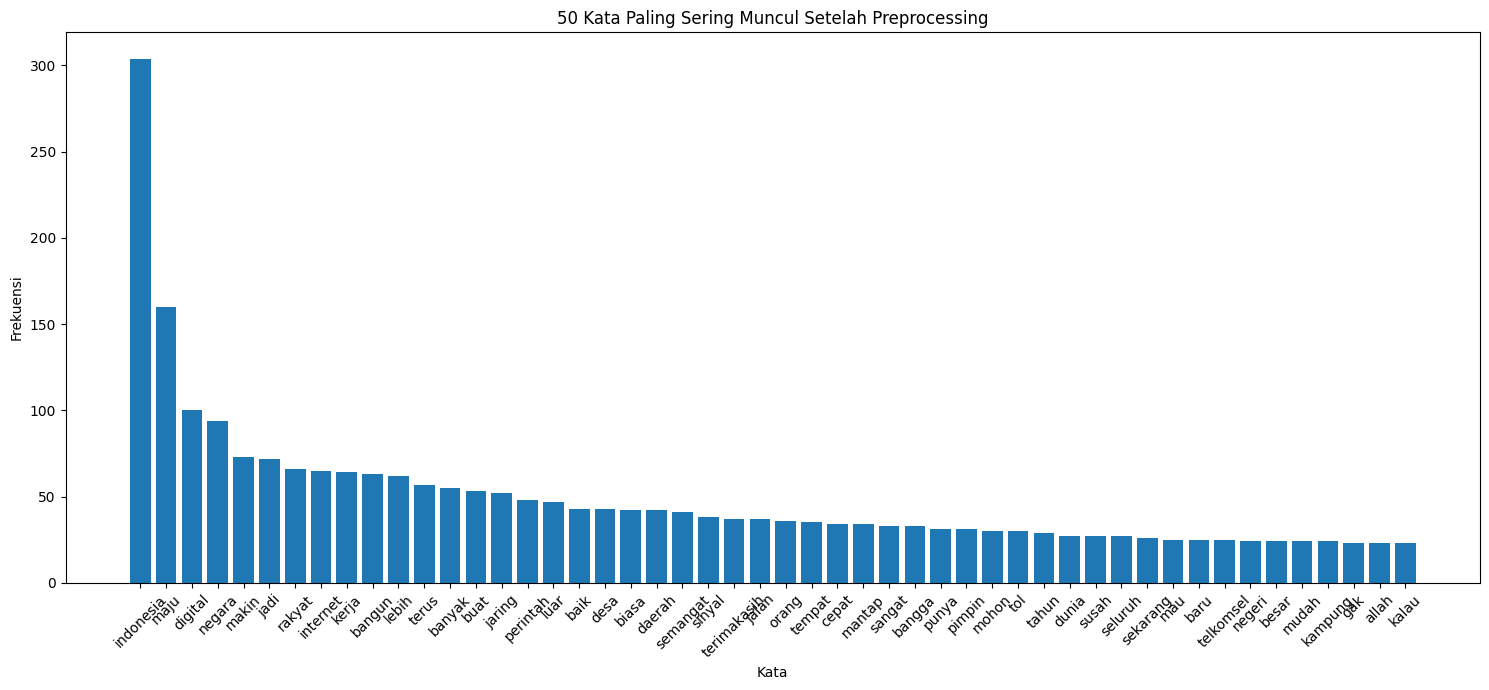

In [165]:
# menggabungkan semua token setelah lemmatization menjadi satu daftar
all_words = [word for tokens in df['Comment'] for word in tokens]

# menghitung frekuensi kata
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(50)

# visualisasi frekuensi kata
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(15, 7))
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('50 Kata Paling Sering Muncul Setelah Preprocessing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**WORDCLOUD**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


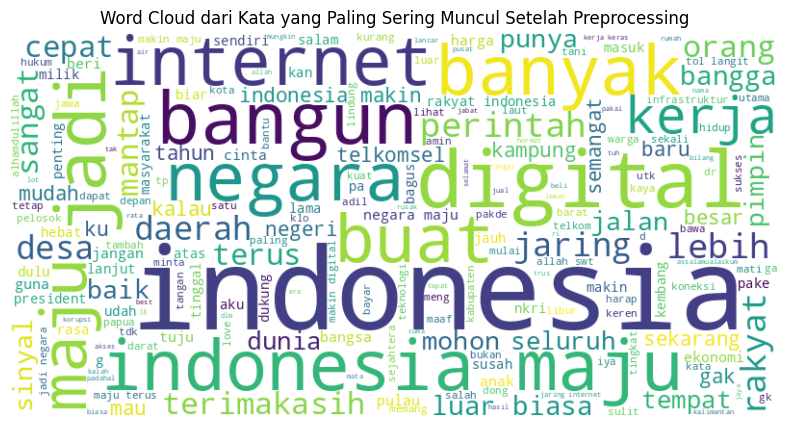

In [166]:
# membuat word cloud dari kata-kata setelah preprocessing
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# visualisasi Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kata yang Paling Sering Muncul Setelah Preprocessing')
plt.show()

##**4. TEXT REPRESENTATION**

Dalam konteks dataset komentar tentang digital transformasi di Indonesia, di mana tujuannya untuk pengelompokkan komentar, saya memilih 2 metode text representation berikut:

**1. TF-IDF**
- TF-IDF memberikan bobot lebih tinggi pada kata-kata unik yang muncul dalam komentar tertentu, tetapi jarang muncul di komentar lain
- kata-kata umum (misalnya, stopwords atau kata sambung yang belum tersortir) mendapat bobot yang rendah
- TD-IDF menghasilkan vektor numerik yang dapat digunakan langsung untuk algoritma clustering seperti K-Means atau Hierarchical Clustering

Keuntungan utamanya dalam konteks ini : sebagai representasi utama karena komentar memiliki kata kunci spesifik seperti "digital", "internet", "pemerintah"

**2. Bag-of-Words (BoW)**
- menghitung frekuentsi kata tanpa memperhatikan hubungan antar kata
- cocok untuk algorithma clustering karena menghasilkan vektor numerik
- komentar pendek biasanya memiliki sedikit kata kunci, dan BoQ daapt menangkap informasi ini dengan baik
- namun BoW tidak mempertimbangkan keunikan kata tidak seperti TF-IDF sehingga kata-kata umum bisa mendominasi representasi

Keuntungan utamanya dalam konteks ini : sebagai pembanding untuk melihat apakah model clustering menghasilkan hasil yang konsisten

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
# memeriksa jumlah baris kosong setelah preprocessing
empty_count = (df['Comment'].str.strip() == "").sum()
print(f"Jumlah string kosong setelah preprocessing: {empty_count}")

Jumlah string kosong setelah preprocessing: 0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
# menghapus baris dengan string kosong
df = df[df['Comment'].str.strip() != ""]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [170]:
# melihat contoh teks setelah preprocessing
print(df['Comment'].head(10))

0                                                   []
1     [harap, baik, tetap, satu, indonesia, nusantara]
2                                                   []
4                                        [luar, biasa]
5                                     [pagi, pk, kren]
6                              [pk, kren, luar, biasa]
7                                           [pk, kren]
8                                            [kren, y]
9                                         [pagi, kren]
10                           [seng, sekali, indonesia]
Name: Comment, dtype: object


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
df['Comment'] = df['Comment'].apply(lambda tokens: ' '.join(tokens))

for max_f in [100, 500, 1000, 5000]:
    vectorizer = TfidfVectorizer(max_features=max_f)
    tfidf_matrix = vectorizer.fit_transform(df['Comment'])
    print(f"Max Features: {max_f}, Shape: {tfidf_matrix.shape}")

Max Features: 100, Shape: (926, 100)
Max Features: 500, Shape: (926, 500)
Max Features: 1000, Shape: (926, 768)
Max Features: 5000, Shape: (926, 768)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dari data exploration yang sudah dilakukan berikut yang dipertimbangkan dalam menentukan max_features:
1. dataset terdiri dari 926 komentar, yagn merupakan dataset kecil hingga sedang. **(mungkin 300-100 fitur cukup untuk menangkap informasi penting)**

2. komentar memiliki panjang rata-rata 122 karakter, sebagian besar komentar cukup pendek, sehingga tidak memuat terlalu banyak kata unik **(mungkin 500-800 untuk menangkap variasi kata yang cukup banyak tanpa terlalu membebani model)**

###**TF-IDF**

In [172]:
# TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer(max_features=768)  # maksimal 1000 fitur
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Comment'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
# mengubah hasil ke dalam bentuk DataFrame agar lebih mudah dibaca
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   aamiin  aceh  adil  air  ajar  akhir  akhlak  akibat  akses  aku  ...  \
0     0.0   0.0   0.0  0.0   0.0    0.0     0.0     0.0    0.0  0.0  ...   
1     0.0   0.0   0.0  0.0   0.0    0.0     0.0     0.0    0.0  0.0  ...   
2     0.0   0.0   0.0  0.0   0.0    0.0     0.0     0.0    0.0  0.0  ...   
3     0.0   0.0   0.0  0.0   0.0    0.0     0.0     0.0    0.0  0.0  ...   
4     0.0   0.0   0.0  0.0   0.0    0.0     0.0     0.0    0.0  0.0  ...   

   wilayah  wisata  wow  yakin  yesayawatuna  you  youtube  yra  zaman  zeta  
0      0.0     0.0  0.0    0.0           0.0  0.0      0.0  0.0    0.0   0.0  
1      0.0     0.0  0.0    0.0           0.0  0.0      0.0  0.0    0.0   0.0  
2      0.0     0.0  0.0    0.0           0.0  0.0      0.0  0.0    0.0   0.0  
3      0.0     0.0  0.0    0.0           0.0  0.0      0.0  0.0    0.0   0.0  
4      0.0     0.0  0.0    0.0           0.0  0.0      0.0  0.0    0.0   0.0  

[5 rows x 768 columns]


**DISTRIBUSI NILAI TF-IDF**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


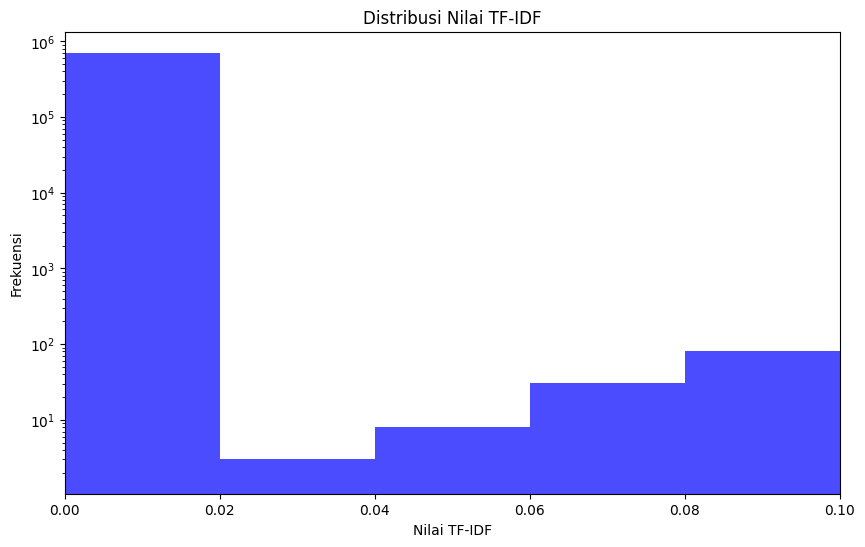

In [174]:
# melihat distribusi nilai TF-IDF dalam matriks
plt.figure(figsize=(10, 6))
plt.hist(tfidf_df.values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribusi Nilai TF-IDF')
plt.xlabel('Nilai TF-IDF')
plt.ylabel('Frekuensi')
plt.yscale('log')  # menggunakan skala logaritmik pada sumbu y
plt.xlim(0, 0.1)   # membatasi sumbu x untuk fokus pada nilai rendah
plt.show()

In [175]:
top_n = 10
top_features = tfidf_df.sum(axis=0).sort_values(ascending=False).head(top_n)
print("Top features dengan bobot TF-IDF tertinggi:\n", top_features)

Top features dengan bobot TF-IDF tertinggi:
 indonesia    56.027032
maju         37.723504
terus        21.405454
digital      20.125497
mantap       19.944577
negara       19.659520
semangat     17.157791
makin        16.910825
jadi         16.696513
luar         16.442610
dtype: float64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###**Bag-of-Words**

In [176]:
# bag-of-Words Representation
bow_vectorizer = CountVectorizer(max_features=768)
bow_matrix = bow_vectorizer.fit_transform(df['Comment'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
# konversi ke DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("Bag-of-Words Representation:")
print(bow_df.head())

Bag-of-Words Representation:
   aamiin  aceh  adil  air  ajar  akhir  akhlak  akibat  akses  aku  ...  \
0       0     0     0    0     0      0       0       0      0    0  ...   
1       0     0     0    0     0      0       0       0      0    0  ...   
2       0     0     0    0     0      0       0       0      0    0  ...   
3       0     0     0    0     0      0       0       0      0    0  ...   
4       0     0     0    0     0      0       0       0      0    0  ...   

   wilayah  wisata  wow  yakin  yesayawatuna  you  youtube  yra  zaman  zeta  
0        0       0    0      0             0    0        0    0      0     0  
1        0       0    0      0             0    0        0    0      0     0  
2        0       0    0      0             0    0        0    0      0     0  
3        0       0    0      0             0    0        0    0      0     0  
4        0       0    0      0             0    0        0    0      0     0  

[5 rows x 768 columns]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**DISTRIBUSI NILAI BoW**

In [178]:
top_n_bow = bow_df.sum(axis=0).sort_values(ascending=False).head(10)
print("Top features dengan frekuensi tertinggi (BoW):\n", top_n_bow)

Top features dengan frekuensi tertinggi (BoW):
 indonesia    304
maju         160
digital      100
negara        94
makin         73
jadi          72
rakyat        66
internet      65
kerja         64
bangun        63
dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**B. PENGELOMPOKKAN KOMENTAR DENGAN MENGGUNAKAN CLUSTERING**

b.
[15%] Lakukan pengelompokan komentar dengan menggunakan pendekatan clustering, silahkan ujicoba beberapa nilai cluster (k) yang mungkin anda peroleh dari data tersebut dan juga beberapa text repsesentation yang diperoleh dari 2a, berikan perbandingan silhoutte score sebagai justifikasi jumlah cluster (k) yang akan anda pilih.

In [179]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###**CLUSTERING DENGAN TF-IDF**

In [180]:
k_tfidf = 3

kmeans_tfidf = KMeans(n_clusters=k_tfidf, random_state=42)
cluster_labels_tfidf = kmeans_tfidf.fit_predict(tfidf_matrix)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
tfidf_silhouette_score = silhouette_score(tfidf_matrix, cluster_labels_tfidf)
print(f"Silhouette Score (TF-IDF, k=3): {tfidf_silhouette_score}")

Silhouette Score (TF-IDF, k=3): 0.03191610601860398


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
# distribusi cluster
df['Cluster_TFIDF'] = cluster_labels_tfidf
print("Distribusi Cluster (TF-IDF):")
print(df['Cluster_TFIDF'].value_counts())

Distribusi Cluster (TF-IDF):
Cluster_TFIDF
0    741
2    157
1     28
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###**CLUSTERING DENGAN BoW**

In [183]:
k_bow = 3

kmeans_bow = KMeans(n_clusters=k_bow, random_state=42)
cluster_labels_bow = kmeans_bow.fit_predict(bow_matrix)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
bow_silhouette_score = silhouette_score(bow_matrix, cluster_labels_bow)
print(f"Silhouette Score (BoW, k=3): {bow_silhouette_score}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score (BoW, k=3): 0.24253150250745226


In [185]:
# distribusi cluster
df['Cluster_BoW'] = cluster_labels_bow
print("Distribusi Cluster (BoW):")
print(df['Cluster_BoW'].value_counts())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Distribusi Cluster (BoW):
Cluster_BoW
0    917
1      8
2      1
Name: count, dtype: int64


###**VISUALISASI SILHOUETTE SCORE**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


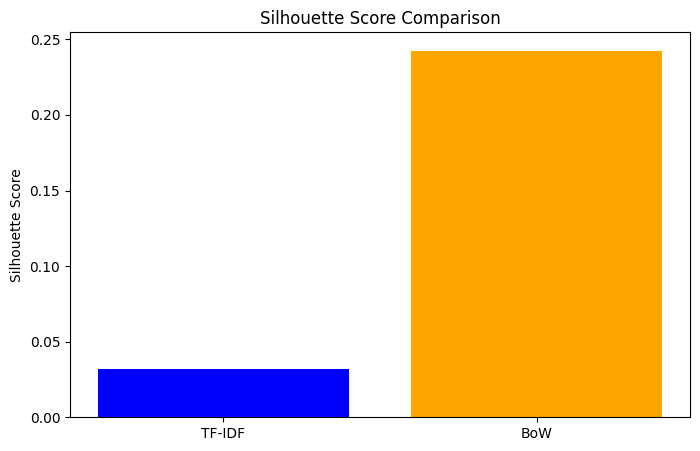

In [186]:
# visualisasi Silhouette Score
methods = ['TF-IDF', 'BoW']
scores = [tfidf_silhouette_score, bow_silhouette_score]

plt.figure(figsize=(8, 5))
plt.bar(methods, scores, color=['blue', 'orange'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score for k=2: 0.031367021473758784
Silhouette Score for k=3: 0.03191610601860398
Silhouette Score for k=4: 0.02510885456131715
Silhouette Score for k=5: 0.02707639977072948
Silhouette Score for k=6: 0.03068947554801534
Silhouette Score for k=7: 0.031506458383967824
Silhouette Score for k=8: 0.03543429857841073
Silhouette Score for k=9: 0.04055704789037133


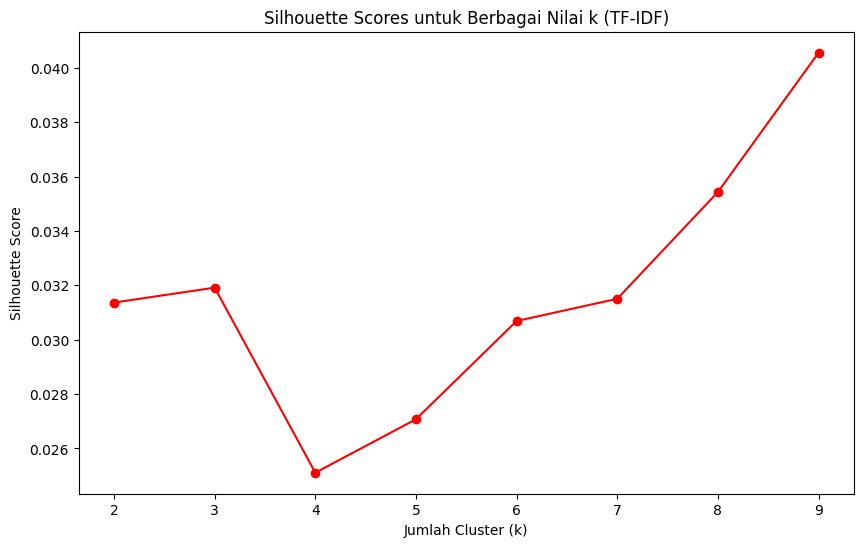

In [187]:
from sklearn.metrics import silhouette_score

k_values = range(2, 10)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)  # Bisa diganti bow_matrix
    score = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# visualisasi Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores untuk Berbagai Nilai k (TF-IDF)')
plt.show()

**1. Grafik Silhouette Score (TF-IDF)**
- **Hasil**:
  - Nilai **silhouette score** meningkat secara perlahan dari **k=2** hingga **k=9**.
  - Nilai tertinggi adalah **k=9** dengan **silhouette score ≈ 0.041**.

- **Interpretasi**:
  - Clustering berbasis **TF-IDF** memberikan hasil terbaik dengan **k=9**, meskipun skor sangat rendah (hanya sedikit lebih baik dari nol).
  - Skor rendah menunjukkan bahwa data memiliki **struktur cluster yang lemah**, artinya komentar mungkin saling tumpang tindih atau tidak memiliki pembagian tema yang jelas.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score for k=2: 0.2419708416418718
Silhouette Score for k=3: 0.24253150250745226
Silhouette Score for k=4: 0.24323844024285435
Silhouette Score for k=5: 0.24576488576037922
Silhouette Score for k=6: 0.24937006106158097
Silhouette Score for k=7: 0.1506055044909703
Silhouette Score for k=8: -0.2854521523752739
Silhouette Score for k=9: -0.28425281063413965


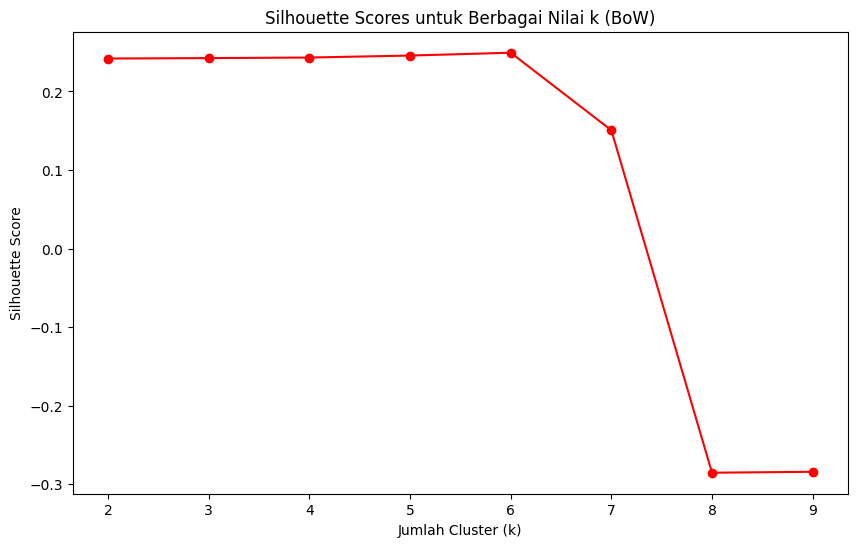

In [188]:
from sklearn.metrics import silhouette_score

k_values = range(2, 10)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(bow_matrix)
    score = silhouette_score(bow_matrix, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# visualisasi Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores untuk Berbagai Nilai k (BoW)')
plt.show()

**2. Grafik Silhouette Score (BoW)**
- **Hasil**:
  - Nilai silhouette score tinggi pada **k=2 hingga k=6** (~0.20).
  - Skor menurun drastis setelah **k=7**, hingga negatif di **k=8** dan **k=9**.

- **Interpretasi**:
  - Clustering berbasis **BoW** menunjukkan hasil yang stabil pada **k=2 hingga k=6**, tetapi performa memburuk drastis pada **k>7**.
  - Hal ini menunjukkan bahwa **k=6** adalah jumlah cluster terbaik untuk **BoW**, dengan silhouette score konsisten dan cukup tinggi dibandingkan representasi TF-IDF.

###**VISUALISASI METODE ELBOW**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


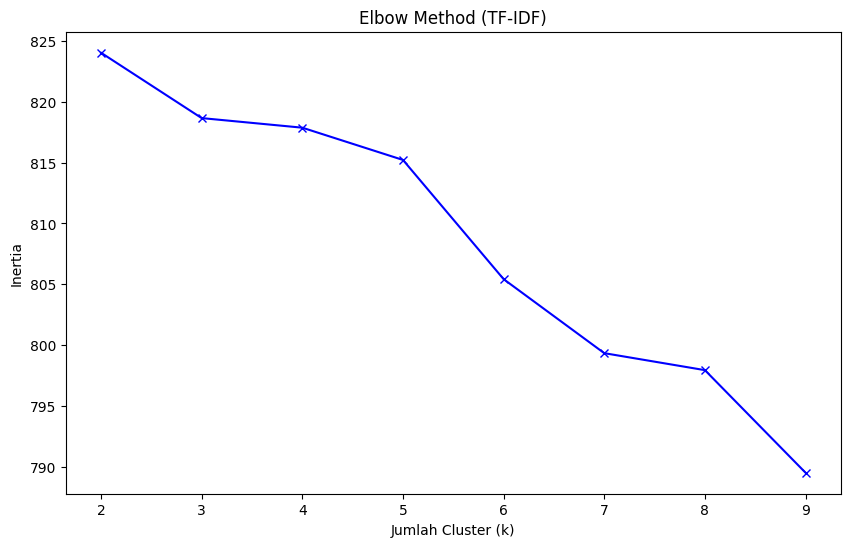

In [189]:
distortions = []
k_values = range(2, 10)  # Coba berbagai nilai k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    distortions.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (TF-IDF)')
plt.show()

**3. Grafik Elbow Method (TF-IDF)**
- **Hasil**:
  - Inertia menurun secara bertahap seiring bertambahnya **k**.
  - Tidak ada "elbow" yang jelas, tetapi penurunan mulai melandai setelah **k=6**.

- **Interpretasi**:
  - Penurunan inertia menunjukkan bahwa menambah cluster membantu menjelaskan variansi data, tetapi tidak ada titik yang signifikan mengindikasikan jumlah cluster optimal.
  - Berdasarkan kombinasi inertia dan silhouette score, **k=9** masih bisa dipertimbangkan.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


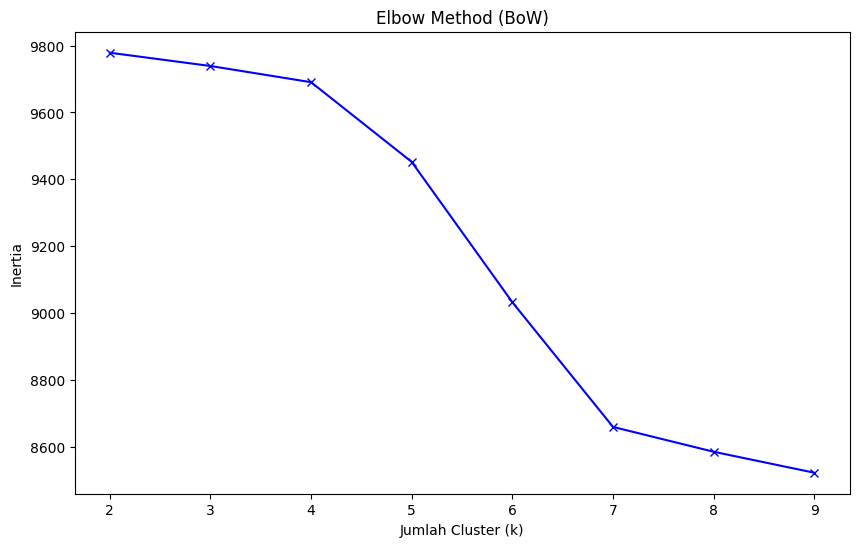

In [190]:
distortions = []
k_values = range(2, 10)  # Coba berbagai nilai k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bow_matrix)
    distortions.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (BoW)')
plt.show()

**4. Grafik Elbow Method (BoW)**
- **Hasil**:
  - Pola mirip dengan TF-IDF: penurunan inertia bertahap tanpa "elbow" yang jelas.
  - Penurunan lebih terlihat melandai pada **k>6**.

- **Interpretasi**:
  - Elbow method memberikan hasil yang mendukung **k=6**, konsisten dengan hasil silhouette score dari BoW.

###**HASIL CLUSTERING DENGAN NILAI K TERBAIK**

 **Kesimpulan**
Berdasarkan kedua representasi teks:
1. **TF-IDF**:
   - Jumlah cluster optimal: **k=9** (silhouette score tertinggi, meskipun rendah).
   - Cocok untuk mencoba memecah komentar menjadi lebih banyak tema.

2. **BoW**:
   - Jumlah cluster optimal: **k=6** (silhouette score stabil dan tertinggi).
   - Representasi lebih sederhana dan menunjukkan struktur cluster yang lebih jelas.

####1. TF-IDF

In [191]:
k_tfidf = 9

kmeans_tfidf = KMeans(n_clusters=k_tfidf, random_state=42)
cluster_labels_tfidf = kmeans_tfidf.fit_predict(tfidf_matrix)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
tfidf_silhouette_score = silhouette_score(tfidf_matrix, cluster_labels_tfidf)
print(f"Silhouette Score (TF-IDF, k=9): {tfidf_silhouette_score}")

Silhouette Score (TF-IDF, k=9): 0.04055704789037133


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [193]:
# distribusi cluster
df['Cluster_TFIDF'] = cluster_labels_tfidf
print("Distribusi Cluster (TF-IDF):")
print(df['Cluster_TFIDF'].value_counts())

Distribusi Cluster (TF-IDF):
Cluster_TFIDF
2    718
0    142
8     22
4     20
6     13
5      5
3      3
7      2
1      1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####2. BoW

In [194]:
k_bow = 6

kmeans_bow = KMeans(n_clusters=k_bow, random_state=42)
cluster_labels_bow = kmeans_bow.fit_predict(bow_matrix)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
bow_silhouette_score = silhouette_score(bow_matrix, cluster_labels_bow)
print(f"Silhouette Score (BoW, k=6): {bow_silhouette_score}")

Silhouette Score (BoW, k=6): 0.24937006106158097


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
# distribusi cluster
df['Cluster_BoW'] = cluster_labels_bow
print("Distribusi Cluster (BoW):")
print(df['Cluster_BoW'].value_counts())

Distribusi Cluster (BoW):
Cluster_BoW
0    914
1      8
4      1
2      1
5      1
3      1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####VISUASLIASI AKHIR PERBANDINGAN

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


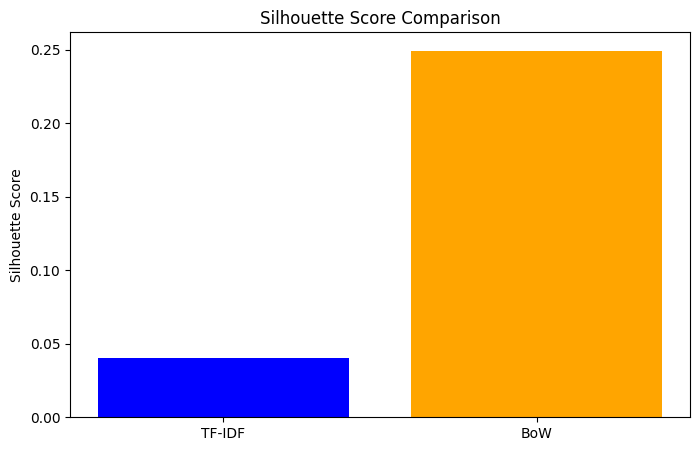

In [197]:
# visualisasi Silhouette Score
methods = ['TF-IDF', 'BoW']
scores = [tfidf_silhouette_score, bow_silhouette_score]

plt.figure(figsize=(8, 5))
plt.bar(methods, scores, color=['blue', 'orange'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.show()

##**KESIMPULAN AKHIR**

**Bag-of-Words (BoW)** adalah metode yang lebih baik untuk clustering komentar YouTube terkait digital transformasi di Indonesia, karena:
- Memberikan silhouette score yang lebih tinggi dan stabil.
- Menghasilkan jumlah cluster yang lebih kecil (k=6), yang lebih realistis untuk analisis tema dalam komentar YouTube.
- Lebih sederhana dan tetap efektif dalam menangkap informasi dari dataset yang relatif kecil dan komentar pendek.

TF-IDF dapat digunakan jika ingin mencoba jumlah cluster yang lebih besar (misalnya, k=9), tetapi hasilnya mungkin kurang bermakna karena struktur cluster yang lemah.

#**C. PERSONA ANALYSIS PADA MODEL CLUSTERING**

c.
[5%] Lakukan persona analysis untuk cluster yang anda hasilkan, jelaskan informasi yang anda peroleh mengenai cluster tersebut berdasarkan personanya.

In [198]:
df.tail()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Comment  Cluster_TFIDF  Cluster_BoW  Sentiment  Topic_TFIDF  Topic_BoW
979                         2            0        0.0            0          0
981                         2            0        0.0            0          0
982  president              6            0        0.0            4          4
983  negeri ku              2            0        0.0            1          1
987                         2            0        0.0            0          0

##**1. IDENTIFIKASI KOMENTAR PADA SETIAP CLUSTER**

mengetahui distribusi jumlah komentar di setiap cluster

In [199]:
# menambahkan kolom cluster ke dataframe
df['Cluster_TFIDF'] = cluster_labels_tfidf  # jika TF-IDF digunakan
df['Cluster_BoW'] = cluster_labels_bow  # jika BoW digunakan

# melihat distribusi komentar per cluster
print("Distribusi komentar per cluster (TF-IDF):")
print(df['Cluster_TFIDF'].value_counts())

print("\nDistribusi komentar per cluster (BoW):")
print(df['Cluster_BoW'].value_counts())

Distribusi komentar per cluster (TF-IDF):
Cluster_TFIDF
2    718
0    142
8     22
4     20
6     13
5      5
3      3
7      2
1      1
Name: count, dtype: int64

Distribusi komentar per cluster (BoW):
Cluster_BoW
0    914
1      8
4      1
2      1
5      1
3      1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**2. ANALISIS KATA-KATA YANG SERING MUNCUL PER CLUSTER**

kata-kata yang sering muncul untuk bantu memahami topik yang dominan di setiap cluster

In [200]:
# fungsi untuk mendapatkan kata-kata yang sering muncul di setiap cluster
def get_top_words(df, cluster_col, n_top=10):
    top_words = {}
    for cluster in df[cluster_col].unique():
        # gabungkan semua komentar dalam cluster
        cluster_comments = df[df[cluster_col] == cluster]['Comment']
        all_words = ' '.join(cluster_comments).split()

        # hitung frekuensi kata
        word_freq = Counter(all_words)
        top_words[cluster] = word_freq.most_common(n_top)

    return top_words

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [201]:
# Top words untuk TF-IDF clusters
print("Top Words per Cluster (TF-IDF):")
tfidf_top_words = get_top_words(df, 'Cluster_TFIDF')
for cluster, words in tfidf_top_words.items():
    print(f"Cluster {cluster}: {words}")

Top Words per Cluster (TF-IDF):
Cluster 2: [('indonesia', 105), ('digital', 63), ('negara', 62), ('internet', 62), ('rakyat', 53), ('jaring', 51), ('kerja', 49), ('banyak', 48), ('makin', 47), ('jadi', 46)]
Cluster 0: [('indonesia', 187), ('maju', 113), ('digital', 36), ('negara', 31), ('jadi', 25), ('makin', 22), ('terus', 19), ('lebih', 19), ('bangun', 18), ('baik', 15)]
Cluster 4: [('semangat', 16), ('terus', 14), ('i', 1), ('love', 1), ('pa', 1), ('video', 1), ('baru', 1), ('bangun', 1), ('indonesia', 1), ('maju', 1)]
Cluster 8: [('mantap', 22), ('maju', 3), ('indonesia', 3), ('pakde', 2), ('pokok', 1), ('slalu', 1), ('banyak', 1), ('wow', 1), ('sekali', 1), ('banget', 1)]
Cluster 5: [('mantul', 4), ('indonesia', 2), ('memang', 2), ('wow', 1), ('tuju', 1), ('digital', 1), ('jadi', 1), ('negara', 1), ('besar', 1)]
Cluster 1: [('utang', 2), ('makin', 2), ('banyak', 2), ('hutang', 1), ('pajak', 1), ('print', 1), ('money', 1)]
Cluster 7: [('gg', 2), ('ni', 1), ('pakde', 1)]
Cluster 6: 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [202]:
# Top words untuk BoW clusters
print("Top Words per Cluster (BoW):")
bow_top_words = get_top_words(df, 'Cluster_BoW')
for cluster, words in bow_top_words.items():
    print(f"Cluster {cluster}: {words}")

Top Words per Cluster (BoW):
Cluster 0: [('indonesia', 304), ('maju', 159), ('digital', 98), ('negara', 89), ('makin', 72), ('jadi', 69), ('rakyat', 66), ('kerja', 63), ('bangun', 62), ('internet', 61)]
Cluster 4: [('makasar', 9), ('kec', 5), ('jakarta', 5), ('timur', 5), ('kp', 4), ('tempat', 4), ('bas', 4), ('sarang', 4), ('preman', 3), ('pasar', 2)]
Cluster 2: [('paa', 5), ('semangat', 2), ('sawah', 2), ('datang', 1), ('desa', 1), ('bangun', 1), ('air', 1), ('lebih', 1), ('makmur', 1), ('jaya', 1)]
Cluster 5: [('alpha', 10), ('hingga', 10), ('zeta', 10), ('neo', 8), ('infinite', 7), ('virus', 2), ('lemah', 1), ('baru', 1), ('mulai', 1)]
Cluster 1: [('jalan', 17), ('internet', 4), ('koneksi', 3), ('baik', 3), ('bagus', 3), ('rusak', 3), ('aku', 3), ('digital', 2), ('mas', 2), ('negara', 2)]
Cluster 3: [('tkw', 4), ('negara', 3), ('tki', 2), ('maju', 1), ('pulang', 1), ('ikan', 1), ('kerja', 1), ('negri', 1), ('sendiri', 1), ('kalau', 1)]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**3. VISUALISASI WORD CLOUD PER CLUSTER**

In [203]:
# fungsi untuk membuat word cloud per cluster
def plot_wordcloud(df, cluster_col):
    clusters = df[cluster_col].unique()
    for cluster in clusters:
        cluster_comments = df[df[cluster_col] == cluster]['Comment']
        all_words = ' '.join(cluster_comments)

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

        # plot Word Cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Cluster {cluster}")
        plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word Cloud (TF-IDF):


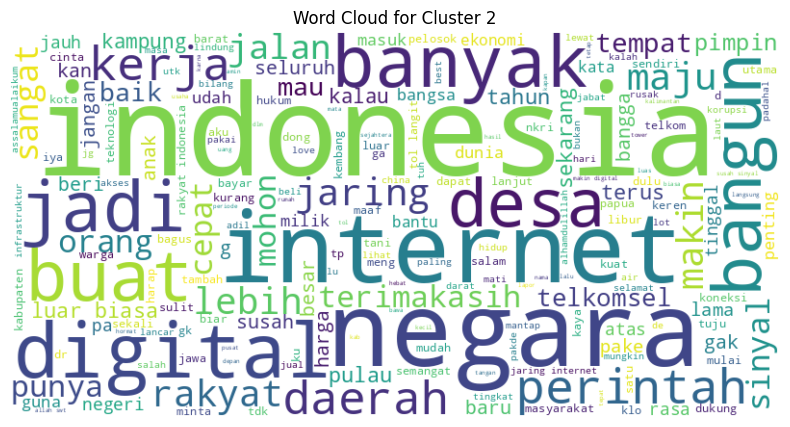

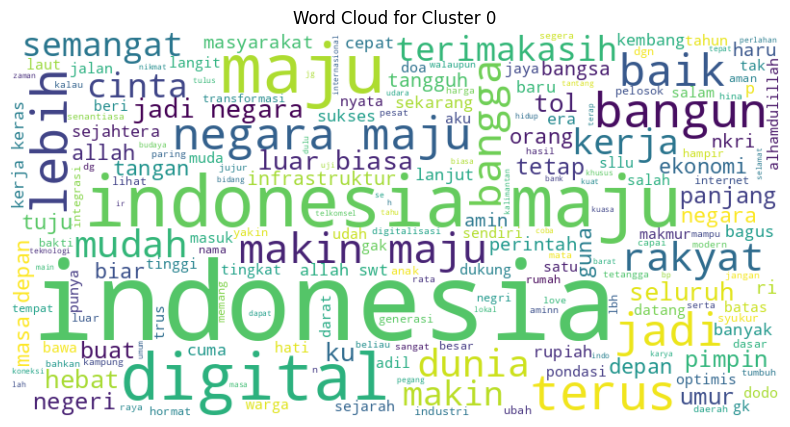

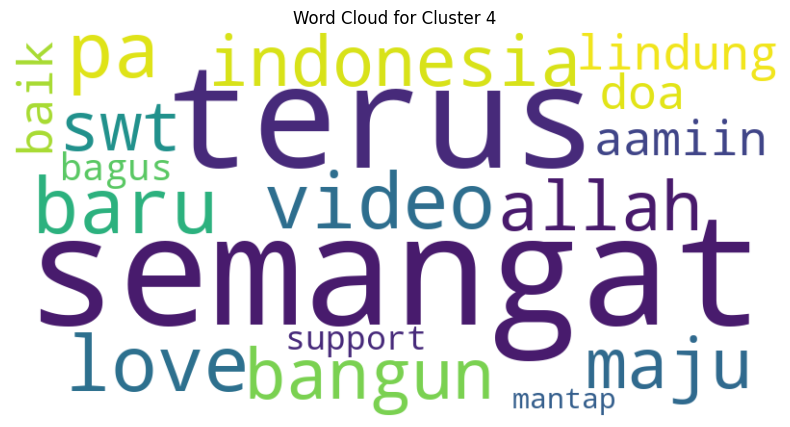

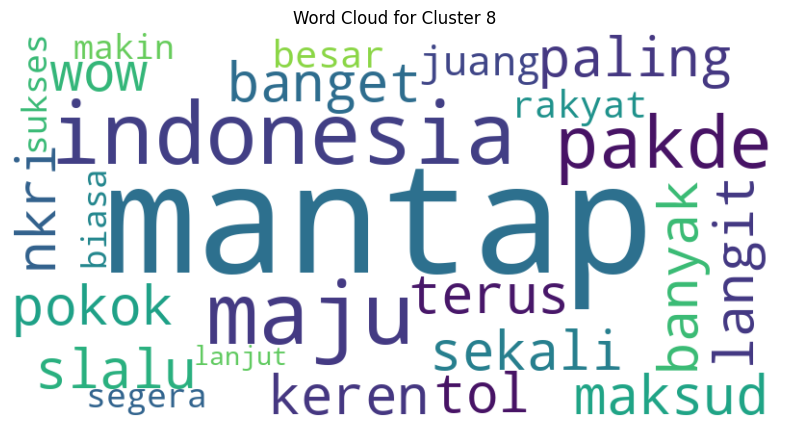

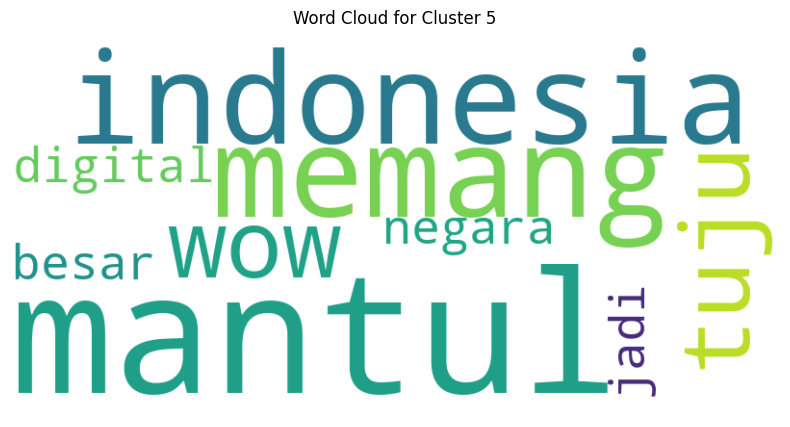

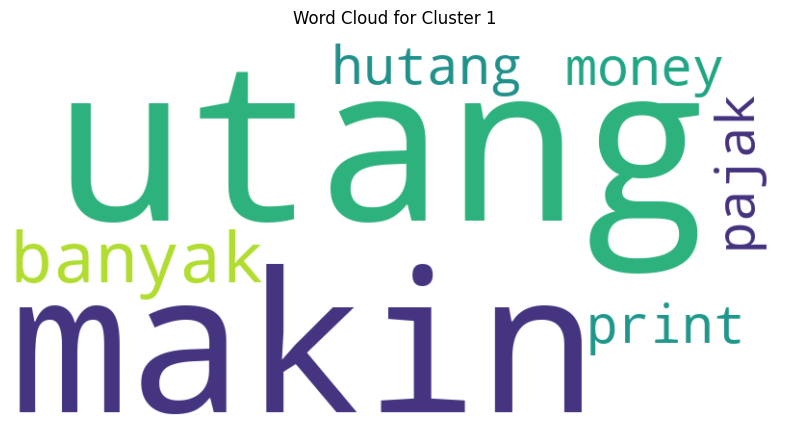

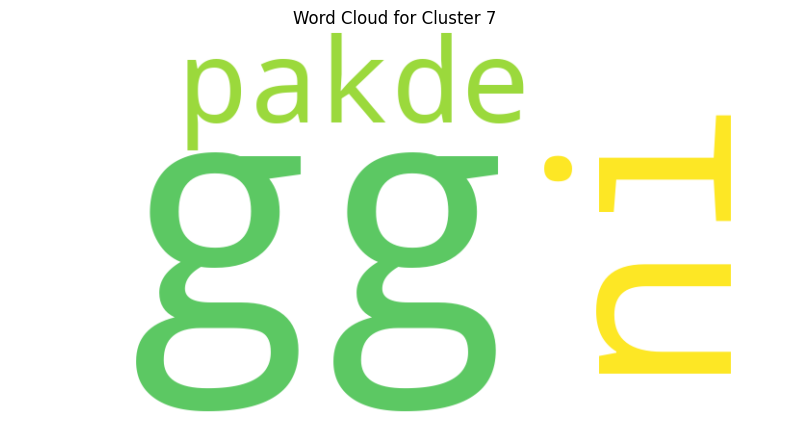

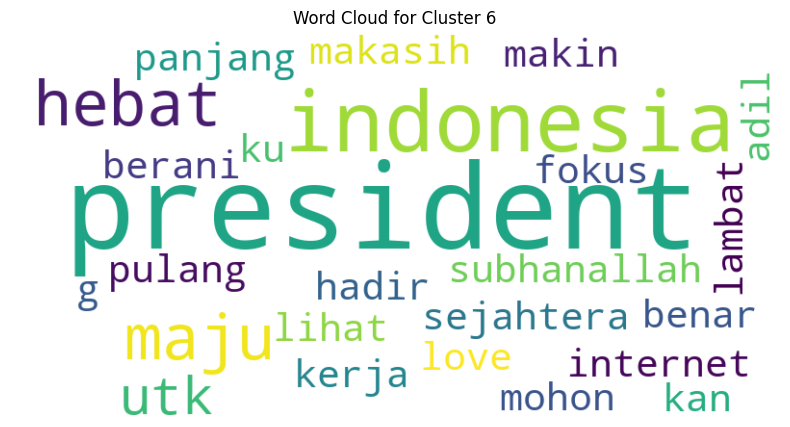

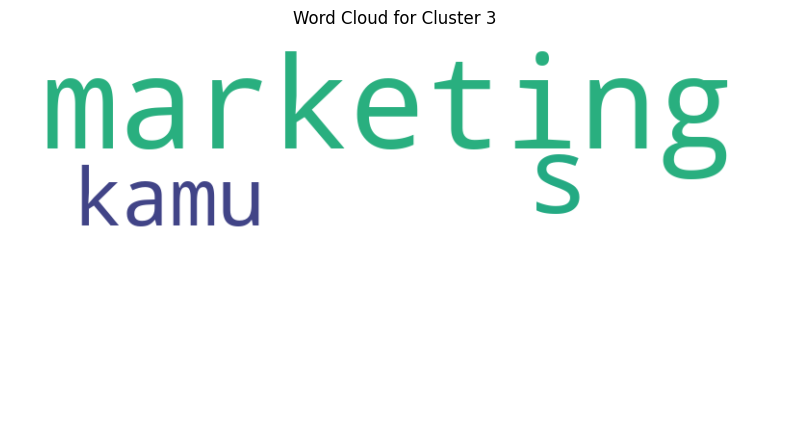

In [204]:
# visualisasi Word Cloud untuk TF-IDF clusters
print("Word Cloud (TF-IDF):")
plot_wordcloud(df, 'Cluster_TFIDF')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Word Cloud (BoW):


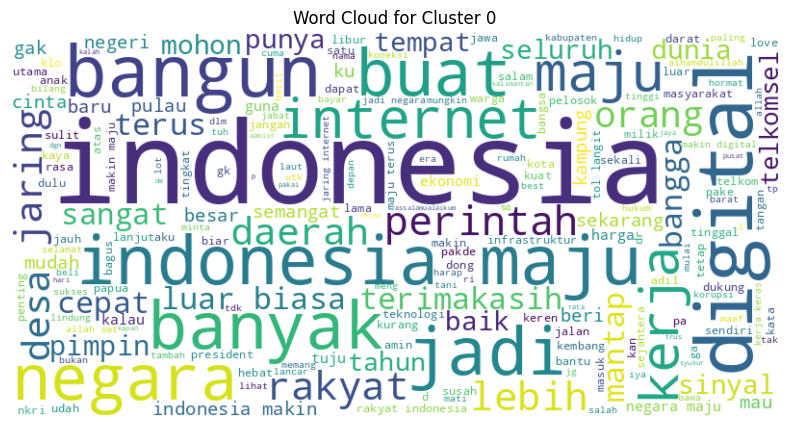

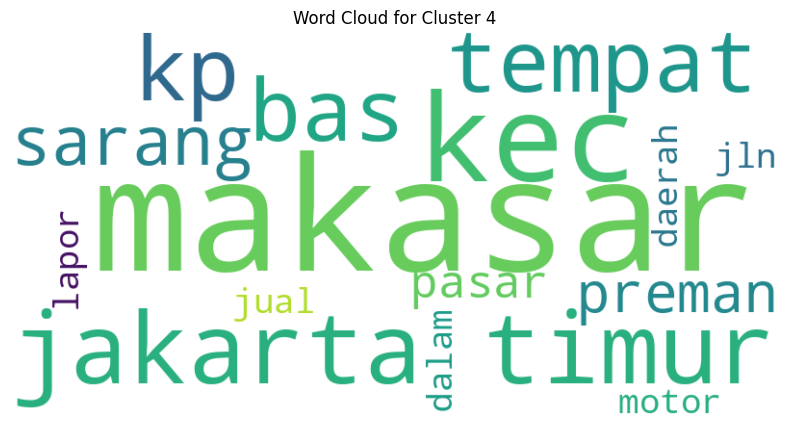

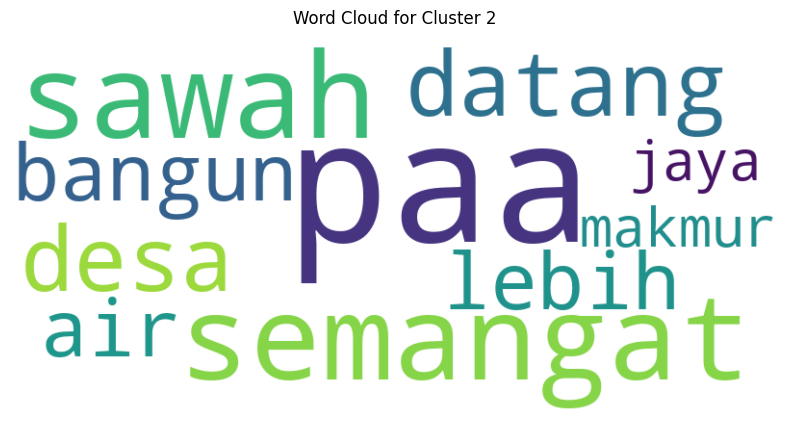

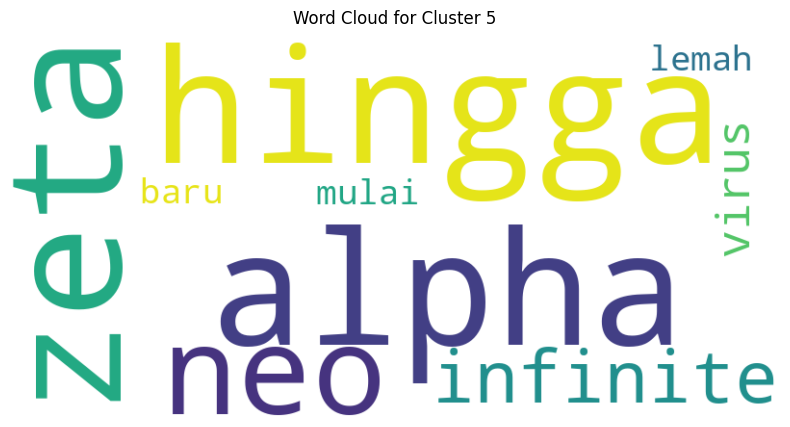

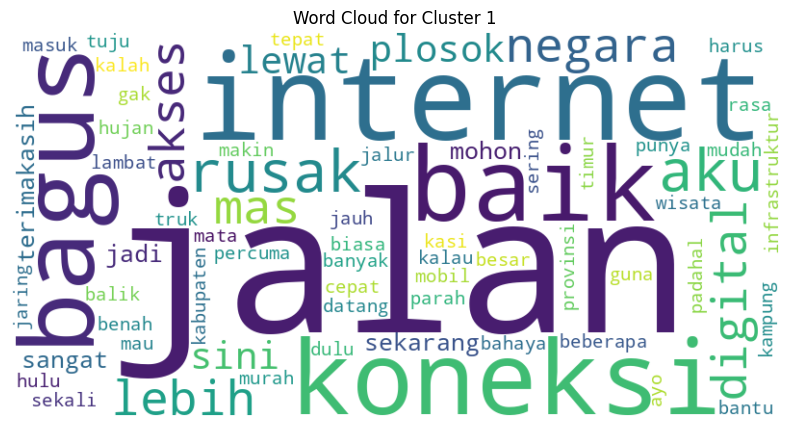

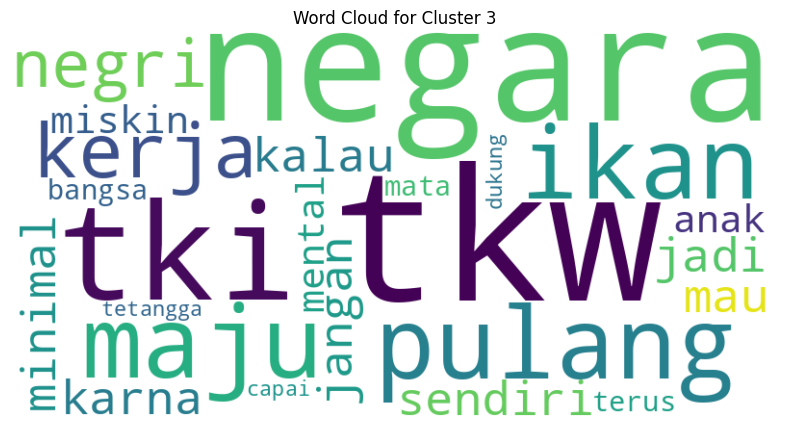

In [205]:
# visualisasi Word Cloud untuk BoW clusters
print("Word Cloud (BoW):")
plot_wordcloud(df, 'Cluster_BoW')

##**4. EKSTRAK CONTOH KOMENTAR DARI SETIAP CLUSTER**

melihat beberapa contoh kompentar dari setiap cluster untuk membantu memahami konteks dari kata-kata yang sering muncul

In [206]:
# contoh komentar per cluster
def get_sample_comments(df, cluster_column, n=5):
    # iterasi untuk setiap cluster
    clusters = df[cluster_column].unique()
    for cluster in clusters:
        print(f"\nCluster {cluster} (Sample Comments):")

        # filter komentar berdasarkan cluster
        cluster_data = df[df[cluster_column] == cluster]['Comment']

        # jika jumlah data di cluster lebih kecil dari n, ambil semua
        if len(cluster_data) < n:
            sample_comments = cluster_data
        else:
            sample_comments = cluster_data.sample(n, random_state=42)

        # menampilkan komentar
        for idx, comment in enumerate(sample_comments, 1):
            print(f"{idx}. {comment}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
# sample komentar untuk TF-IDF clusters
print("Sample Comments per Cluster (TF-IDF):")
get_sample_comments(df, 'Cluster_TFIDF', n=5)

Sample Comments per Cluster (TF-IDF):

Cluster 2 (Sample Comments):
1. aplikator banyak driver pakek aplikasi lapang beberapa aplikator cari susah bgt buat driver pakek aplikasi masuk driver pakek dunia kerja harus saing buat aplikator gk mau berantas driver pakek s
2. 
3. siapa pas tol langit mulut wakil sekarang maksud
4. keren
5. luas jaring kuat sinyal masyarakat nikmat layan digital banyak daerah jangkau jaring digital koneksi cepat gak bantu banyak daerah jaring digital

Cluster 0 (Sample Comments):
1. allah sungguh indonesia ku president maju indonesia makin maju
2. indonesia jadi negara maju dunia masyarakat lebih kerja negara sendiri negara
3. maju
4. indonesia maju slalu nkri
5. panjang umur indonesia negara juang

Cluster 4 (Sample Comments):
1. semangat i love
2. semangat
3. semangat terus
4. semangat
5. semangat terus

Cluster 8 (Sample Comments):
1. mantap
2. mantap pakde maju nkri juang rakyat indonesia
3. maksud tol langit mantap
4. mantap pokok slalu banyak
5. mantap



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [208]:
# sample komentar untuk BoW clusters
print("Sample Comments per Cluster (BoW):")
get_sample_comments(df, 'Cluster_BoW', n=5)

Sample Comments per Cluster (BoW):

Cluster 0 (Sample Comments):
1. harap tempat dapat langsung tangan
2. hadir
3. mohon kunjung garut jawa barat bangun jalan tol karna bebas masyarakat jawa barat khusus garut nanti terlalu lama mohon kunjung garut
4. tol laut tol udara pa sampe pelosok desa internet
5. indonesia pk

Cluster 4 (Sample Comments):
1. lapor daerah kp makasar kec makasar jakarta timur tempat bas sarang preman pasar kp makasar kec makasar jakarta timur kec makasar jakarta timur tempat bas sarang preman jln kp makasar kec makasar jakarta timur tempat bas sarang preman jual motor dalam pasar kp makasar kec makasar jakarta timur tempat bas sarang

Cluster 2 (Sample Comments):
1. semangat paa paa datang desa paa bangun air sawah sawah lebih makmur jaya paa semangat paa

Cluster 5 (Sample Comments):
1. lemah virus baru virus mulai alpha hingga zeta alpha hingga zeta alpha hingga zeta alpha hingga zeta alpha infinite hingga zeta infinite alpha infinite hingga zeta infinite neo al

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**5. ANALISIS SENTIMEN PER CLUSTER**

analisis rata-rata sentimen per cluster untuk menunjukkan apakah komentar di cluster tersebut lebih positif, negatif, atau netral

In [209]:
from textblob import TextBlob

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [210]:
# fungsi untuk menghitung sentimen
def analyze_sentiment(comment):
    sentiment = TextBlob(comment).sentiment
    return sentiment.polarity  # skor sentimen: positif, negatif, atau netral

# tambahkan kolom sentimen ke dataframe
df['Sentiment'] = df['Comment'].apply(analyze_sentiment)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [211]:
# rata-rata sentimen per cluster
print("Rata-rata sentimen per cluster (TF-IDF):")
print(df.groupby('Cluster_TFIDF')['Sentiment'].mean())

print("\nRata-rata sentimen per cluster (BoW):")
print(df.groupby('Cluster_BoW')['Sentiment'].mean())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rata-rata sentimen per cluster (TF-IDF):
Cluster_TFIDF
0    0.019053
1    0.000000
2    0.017920
3    0.000000
4    0.025000
5    0.010000
6    0.038462
7    0.000000
8    0.004545
Name: Sentiment, dtype: float64

Rata-rata sentimen per cluster (BoW):
Cluster_BoW
0    0.018405
1    0.000000
2    0.000000
3   -0.100000
4    0.000000
5    0.000000
Name: Sentiment, dtype: float64


##**HASIL PERSONA ANALYSIS**

### **Persona Analysis berdasarkan TF-IDF Clustering**
#### **Cluster 0 (Optimisme Pembangunan Digital di Indonesia)**
- **Top Words:** "indonesia", "maju", "digital", "negara", "jadi".
- **Sample Comments:**
  - "allah sungguh indonesia ku president maju indonesia makin maju."
  - "indonesia jadi negara maju dunia masyarakat lebih kerja negara sendiri negara."
- **Sentimen:** **Positif Ringan (0.019053)**.
- **Analisis Persona:**
  - Komentar yang optimis tentang transformasi digital di Indonesia.
  - Menggambarkan harapan besar terhadap pembangunan digital dan kemajuan negara.

#### **Cluster 1 (Ketidakpuasan dan Kritik Ekonomi)**
- **Top Words:** "utang", "makin", "pajak", "hutang".
- **Sample Comments:**
  - "hutang utang makin banyak pajak makin banyak utang print money."
- **Sentimen:** **Netral (0.0)**.
- **Analisis Persona:**
  - Komentar yang mengkritik kebijakan ekonomi, utang negara, atau pajak.
  - Cluster ini mungkin berisi individu yang tidak puas dengan arah kebijakan saat ini.

#### **Cluster 2 (Infrastruktur Digital dan Layanan Internet)**
- **Top Words:** "digital", "internet", "jaring", "rakyat", "kerja".
- **Sample Comments:**
  - "luas jaring kuat sinyal masyarakat nikmat layan digital banyak daerah."
  - "aplikator banyak driver pakek aplikasi lapang beberapa aplikator."
- **Sentimen:** **Positif Ringan (0.017920)**.
- **Analisis Persona:**
  - Fokus pada infrastruktur digital, jaringan internet, dan layanan masyarakat.
  - Persona ini menggambarkan keinginan untuk pemerataan akses digital.

#### **Cluster 3 (Komentar yang Tidak Informatif)**
- **Top Words:** "marketing", "s", "kamu".
- **Sample Comments:**
  - "s marketing."
  - "kamu s marketing."
- **Sentimen:** **Netral (0.0)**.
- **Analisis Persona:**
  - Komentar tidak relevan atau sulit untuk dikategorikan.
  - Persona ini mungkin adalah komentar acak yang tidak berkaitan dengan tema utama.

#### **Cluster 4 (Semangat dan Dukungan Positif)**
- **Top Words:** "semangat", "terus", "i", "love".
- **Sample Comments:**
  - "semangat terus."
  - "semangat i love."
- **Sentimen:** **Positif Ringan (0.025000)**.
- **Analisis Persona:**
  - Komentar yang penuh semangat dan dukungan terhadap pembangunan digital atau pemerintah.
  - Persona ini mendukung transformasi digital tanpa memberikan detail spesifik.

#### **Cluster 5 (Pujian Sederhana)**
- **Top Words:** "mantul", "indonesia", "digital", "besar".
- **Sample Comments:**
  - "memang mantul."
  - "mantul wow tuju indonesia digital jadi negara besar."
- **Sentimen:** **Positif Ringan (0.010000)**.
- **Analisis Persona:**
  - Komentar yang memuji dengan kata-kata sederhana seperti "mantul".
  - Persona ini berisi dukungan dengan konteks yang kurang mendalam.

#### **Cluster 6 (Dukungan terhadap Pemimpin)**
- **Top Words:** "president", "hebat", "kerja", "maju".
- **Sample Comments:**
  - "my president hebat kerja fokus my president."
  - "kerja fokus my president hebat."
- **Sentimen:** **Positif Tertinggi (0.038462)**.
- **Analisis Persona:**
  - Komentar yang mendukung dan mengapresiasi kepemimpinan Jokowi.
  - Persona ini berisi loyalis atau pendukung pemerintah.

#### **Cluster 7 (Komentar Tidak Jelas/Acak)**
- **Top Words:** "gg", "pakde".
- **Sample Comments:**
  - "ni gg."
  - "gg pakde."
- **Sentimen:** **Netral (0.0)**.
- **Analisis Persona:**
  - Komentar acak atau tidak relevan.
  - Persona ini sulit diinterpretasikan karena minimnya informasi.

#### **Cluster 8 (Pujian Umum dan Sederhana)**
- **Top Words:** "mantap", "maju", "pakde".
- **Sample Comments:**
  - "mantap."
  - "mantap pakde maju nkri juang rakyat indonesia."
- **Sentimen:** **Netral hingga Positif (0.004545)**.
- **Analisis Persona:**
  - Komentar singkat yang memberikan pujian umum.
  - Persona ini menunjukkan dukungan sederhana tanpa rincian.

### **Persona Analysis berdasarkan BoW Clustering**
#### **Cluster 0 (Tema Umum: Digital dan Kemajuan Negara)**
- **Top Words:** "indonesia", "maju", "digital", "negara", "rakyat".
- **Sample Comments:**
  - "tol laut tol udara pa sampe pelosok desa internet."
  - "indonesia pk."
- **Sentimen:** **Positif Ringan (0.018405)**.
- **Analisis Persona:**
  - Komentar umum yang mendukung digitalisasi dan kemajuan Indonesia.
  - Persona ini mencerminkan pandangan optimis tentang pembangunan.

#### **Cluster 1 (Masalah Infrastruktur Jalan dan Internet)**
- **Top Words:** "jalan", "internet", "koneksi", "baik".
- **Sample Comments:**
  - "balik masuk you gak negara sini mata jalan rusak."
  - "infrastruktur jalan rusak parah baik jalan sini."
- **Sentimen:** **Netral (0.0)**.
- **Analisis Persona:**
  - Komentar yang mengkritik kondisi infrastruktur jalan dan koneksi internet.
  - Persona ini berisi individu yang menyampaikan keluhan terhadap pemerintah.

#### **Cluster 2 (Semangat dan Dukungan)**
- **Top Words:** "paa", "semangat", "desa", "bangun".
- **Sample Comments:**
  - "semangat paa paa datang desa paa bangun air sawah."
- **Sentimen:** **Netral (0.0)**.
- **Analisis Persona:**
  - Komentar yang memberikan semangat dan dukungan terhadap pembangunan desa.

#### **Cluster 3 (Tenaga Kerja di Luar Negeri)**
- **Top Words:** "tkw", "negara", "tki", "kerja".
- **Sample Comments:**
  - "negara maju pulang tkw tki ikan kerja negri sendiri."
- **Sentimen:** **Negatif (-0.100000)**.
- **Analisis Persona:**
  - Komentar yang membahas kondisi tenaga kerja di luar negeri (TKI/TKW).
  - Persona ini mengkritik kebijakan atau kondisi yang memaksa warga bekerja di luar negeri.

#### **Cluster 4 (Isu Lokal dan Kriminalitas)**
- **Top Words:** "makasar", "jakarta", "preman".
- **Sample Comments:**
  - "lapor daerah kp makasar kec makasar jakarta timur tempat bas sarang preman."
- **Sentimen:** **Netral (0.0)**.
- **Analisis Persona:**
  - Komentar yang melaporkan masalah lokal, seperti kriminalitas di daerah tertentu.

#### **Cluster 5 (Komentar Tidak Jelas/Acak)**
- **Top Words:** "alpha", "hingga", "zeta".
- **Sample Comments:**
  - "lemah virus baru virus mulai alpha hingga zeta."
- **Sentimen:** **Netral (0.0)**.
- **Analisis Persona:**
  - Komentar acak atau tidak relevan.

#**D. MEMBANDINGKAN HASIL CLUSTERING DENGAN METODE LAIN (PEMODELAN TOPIC EXTRACTION)**

d.
[15%] Anda tertarik untuk membandingkan hasil clustering dengan metode lain yaitu topic extraction, sehingga anda perlu melakukan pemodelan topic extraction. Jelaskan metode topic extraction yang anda lakukan

### **IMPORT LIBRARY UNTUK TOPIC EXTRACTION**

In [212]:
!pip install pyLDAvis

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from gensim import models
import pyLDAvis.gensim
import pyLDAvis

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###PERSIAPAN UNTUK LDA

In [214]:
# memastikan bahwa setiap elemen di df['Comment'] adalah daftar token
if isinstance(df['Comment'].iloc[0], str):
    df['Comment'] = df['Comment'].apply(word_tokenize)

# membuat dictionary
dictionary = Dictionary(df['Comment'])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [215]:
# membuat Bag-of-Words dan TF-IDF corpus
corpus_bow = [dictionary.doc2bow(doc) for doc in df['Comment']]
tfidf = models.TfidfModel(corpus_bow)
corpus_tfidf = tfidf[corpus_bow]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###COBA MENCARI BEST NUM TOPIC UNTUK LDA

TF-IDF

In [216]:
# membuat LDA dengan TF-IDF
coherence_scores_tfidf = []
num_topics_range = range(2, 21)

for num_topics in num_topics_range:
    lda_model_tfidf = models.LdaMulticore(
        corpus=corpus_tfidf,  # Menggunakan representasi TF-IDF
        num_topics=num_topics,
        id2word=dictionary,
        passes=10,
        workers=2,
        random_state=42
    )
    coherence_model_tfidf = CoherenceModel(
        model=lda_model_tfidf, texts=df['Comment'], dictionary=dictionary, coherence='c_v'
    )
    coherence_scores_tfidf.append(coherence_model_tfidf.get_coherence())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


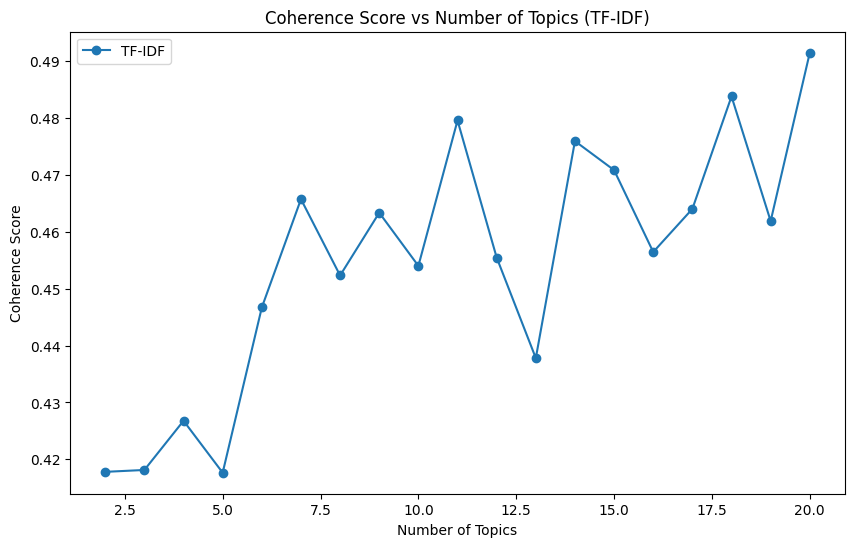

In [217]:
# visualisasi Coherence Score untuk TF-IDF
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores_tfidf, marker='o', linestyle='-', label='TF-IDF')
plt.title('Coherence Score vs Number of Topics (TF-IDF)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend()
plt.show()

BoW

In [218]:
# membuat LDA dengan BoW
coherence_scores_bow = []
num_topics_range = range(2, 21)

for num_topics in num_topics_range:
    lda_model_bow = models.LdaMulticore(
        corpus=corpus_bow,  # Menggunakan representasi BoW
        num_topics=num_topics,
        id2word=dictionary,
        passes=10,
        workers=2,
        random_state=42
    )
    coherence_model_bow = CoherenceModel(
        model=lda_model_bow, texts=df['Comment'], dictionary=dictionary, coherence='c_v'
    )
    coherence_scores_bow.append(coherence_model_bow.get_coherence())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


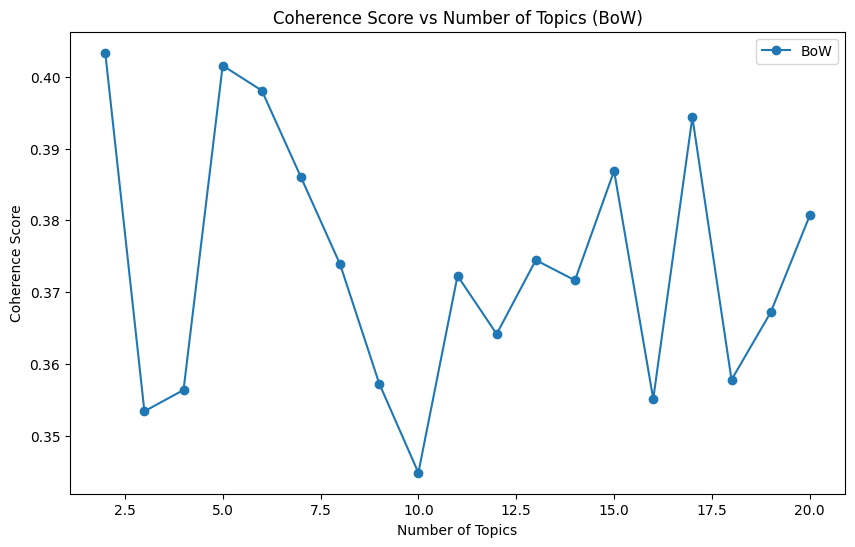

In [219]:
# visualisasi Coherence Score untuk BoW
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores_bow, marker='o', linestyle='-', label='BoW')
plt.title('Coherence Score vs Number of Topics (BoW)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend()
plt.show()

PERBANDINGAN

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


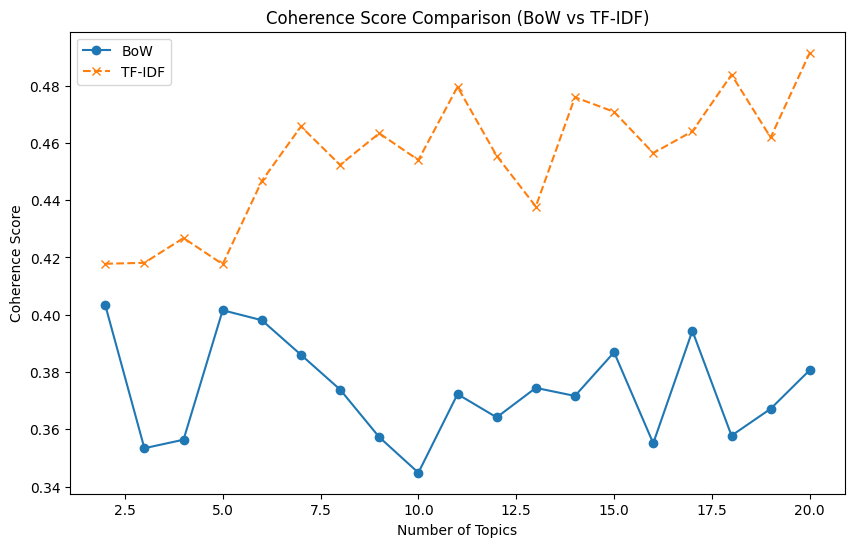

In [220]:
plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores_bow, marker='o', linestyle='-', label='BoW')
plt.plot(num_topics_range, coherence_scores_tfidf, marker='x', linestyle='--', label='TF-IDF')
plt.title('Coherence Score Comparison (BoW vs TF-IDF)')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend()
plt.show()

**Kesimpulan Berdasarkan Visualisasi Coherence Score untuk TF-IDF dan BoW**

1. **Hasil Visualisasi TF-IDF**  
   Grafik menunjukkan bahwa coherence score meningkat secara bertahap seiring dengan bertambahnya jumlah topik, meskipun terdapat fluktuasi kecil di beberapa titik, seperti pada 12 topik. Skor tertinggi dicapai pada jumlah topik **20**, dengan coherence score ≈ **0.49**.  
   - **Interpretasi:**  
     Pendekatan TF-IDF memberikan hasil yang lebih stabil dan mampu menangkap variasi topik dengan lebih baik jika jumlah topik lebih besar digunakan. Ini menunjukkan bahwa data memiliki banyak tema unik yang dapat diidentifikasi melalui representasi ini.  
   - **Dampak pada Analisis:**  
     Dengan TF-IDF, jumlah topik yang lebih besar (misalnya, 10 atau lebih) dapat dipilih untuk menggali tema yang lebih mendetail. Namun, jumlah topik yang lebih besar juga memerlukan interpretasi manual yang lebih kompleks.

2. **Hasil Visualisasi BoW**  
   Grafik menunjukkan fluktuasi yang lebih signifikan dibandingkan TF-IDF. Coherence score mencapai nilai tertinggi pada jumlah topik **2** (≈ **0.41**) dan menurun drastis pada 5-10 topik. Skor kembali meningkat di sekitar 15-20 topik tetapi tetap tidak melebihi nilai awal pada 2 topik.  
   - **Interpretasi:**  
     Pendekatan BoW lebih cocok untuk menangkap tema dengan jumlah topik yang kecil karena data cenderung memiliki distribusi tematik yang sederhana. Penambahan jumlah topik cenderung memperburuk definisi tema dan membuat interpretasi menjadi kurang jelas.  
   - **Dampak pada Analisis:**  
     Dengan BoW, jumlah topik yang lebih kecil (2-5) lebih sesuai karena menghasilkan cluster yang lebih jelas dan sederhana untuk dianalisis.

3. **Perbandingan dan Implikasi pada Analisis**  
   - **Pemilihan Jumlah Topik:**  
     - Untuk **TF-IDF**, jumlah topik besar (10-20) dapat digunakan untuk mengeksplorasi lebih banyak tema spesifik dalam data.  
     - Untuk **BoW**, jumlah topik kecil (2-5) lebih baik karena lebih mampu menangkap tema utama tanpa kehilangan definisi.
   - **Keputusan Akhir:**  
     - Jika tujuan analisis adalah eksplorasi mendalam terhadap banyak tema, **TF-IDF** lebih disarankan.  
     - Jika tujuan adalah untuk analisis cepat dengan tema yang lebih umum, maka **BoW** lebih sesuai.  

**Kesimpulan Akhir:**  
Pemilihan jumlah topik harus disesuaikan dengan tujuan analisis. Pendekatan TF-IDF memberikan fleksibilitas untuk menangkap variasi tema yang lebih banyak, sementara BoW lebih sederhana dan cocok untuk analisis dengan jumlah tema yang lebih sedikit.

###TF-IDF

In [221]:
# parameter LDA
num_topics_tfidf = 9  # jumlah topik yang ingin dihasilkan (bisa diuji coba dengan nilai lain)
lda_model_tfidf = models.LdaMulticore(
    corpus=corpus_tfidf,
    num_topics=num_topics_tfidf,
    id2word=dictionary,
    passes=10,
    workers=2,
    random_state=42,
    alpha=0.7,
    eta=0.7
)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
# evaluasi model
coherence_model_lda_tfidf = CoherenceModel(
    model=lda_model_tfidf, texts=df['Comment'], dictionary=dictionary, coherence='c_v'
)
coherence_score_tfidf = coherence_model_lda_tfidf.get_coherence()
print(f"Coherence Score: {coherence_score_tfidf}")

Coherence Score: 0.37833267288992833


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
# visualisasi dengan pyLDAvis
pyLDAvis.enable_notebook()
lda_vis_tfidf = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(lda_vis_tfidf)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###BoW

In [224]:
# parameter LDA
num_topics_bow = 6  # jumlah topik yang ingin dihasilkan (bisa diuji coba dengan nilai lain)
lda_model_bow = models.LdaMulticore(
    corpus=corpus_bow,
    num_topics=num_topics_bow,
    id2word=dictionary,
    passes=10,
    workers=2,
    random_state=42,
    alpha=0.7,
    eta=0.7
)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
# evaluasi model
coherence_model_lda_bow = CoherenceModel(
    model=lda_model_bow, texts=df['Comment'], dictionary=dictionary, coherence='c_v'
)
coherence_score_bow = coherence_model_lda_bow.get_coherence()
print(f"Coherence Score (BoW): {coherence_score_bow}")

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score (BoW): 0.37909866472311315


In [226]:
# visualisasi dengan pyLDAvis
pyLDAvis.enable_notebook()
lda_vis_bow = pyLDAvis.gensim.prepare(lda_model_bow, corpus_bow, dictionary)
pyLDAvis.display(lda_vis_bow)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**E. PERSONA ANALYSIS PADA MODEL TOPIC EXTRACTION**

e.
[5%] Lakukan persona analysis kembali untuk topik yang anda peroleh, bandingkan apa yang anda peroleh dari pendekatan clustering dan topic extraction. Paparkan hal-hal menarik yang berhasil anda ekstrak.

##**1. MENAMPILKAN TOP WORDS DARI SETIAP TOPIK**

In [227]:
# menampilkan top words untuk TF-IDF
print("\nTop Words per Topic (TF-IDF):")
topics_tfidf = lda_model_tfidf.show_topics(num_topics=num_topics_tfidf, num_words=10, formatted=False)
top_words_tfidf = {}
for topic_num, words in topics_tfidf:
    top_words = [word for word, _ in words]
    top_words_tfidf[topic_num] = top_words
    print(f"Topic {topic_num}: {top_words}")


Top Words per Topic (TF-IDF):
Topic 0: ['indonesia', 'maju', 'terus', 'mantap', 'digital', 'terimakasih', 'negara', 'makin', 'semangat', 'internet']
Topic 1: ['indonesia', 'maju', 'terus', 'mantap', 'negara', 'semangat', 'digital', 'makin', 'bangga', 'biasa']
Topic 2: ['indonesia', 'maju', 'negara', 'digital', 'luar', 'biasa', 'terus', 'mantap', 'internet', 'semangat']
Topic 3: ['indonesia', 'maju', 'digital', 'luar', 'biasa', 'jadi', 'terus', 'mantap', 'negara', 'internet']
Topic 4: ['indonesia', 'maju', 'terus', 'mantap', 'semangat', 'digital', 'negara', 'jadi', 'makin', 'terimakasih']
Topic 5: ['indonesia', 'maju', 'mantap', 'terus', 'digital', 'semangat', 'luar', 'makin', 'biasa', 'internet']
Topic 6: ['indonesia', 'maju', 'mantap', 'biasa', 'digital', 'luar', 'negara', 'internet', 'makin', 'terus']
Topic 7: ['indonesia', 'maju', 'mantap', 'terus', 'digital', 'negara', 'semangat', 'terimakasih', 'luar', 'makin']
Topic 8: ['indonesia', 'maju', 'terus', 'negara', 'digital', 'jadi', 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [228]:
# menampilkan top words untuk BoW
print("\nTop Words per Topic (BoW):")
topics_bow = lda_model_bow.show_topics(num_topics=num_topics_bow, num_words=10, formatted=False)
top_words_bow = {}
for topic_num, words in topics_bow:
    top_words = [word for word, _ in words]
    top_words_bow[topic_num] = top_words
    print(f"Topic {topic_num}: {top_words}")


Top Words per Topic (BoW):
Topic 0: ['jaring', 'internet', 'desa', 'sinyal', 'sangat', 'jalan', 'susah', 'kerja', 'banyak', 'daerah']
Topic 1: ['rakyat', 'indonesia', 'kerja', 'mantap', 'tol', 'tempat', 'langit', 'banyak', 'timur', 'atas']
Topic 2: ['perintah', 'telkomsel', 'negara', 'pulau', 'lebih', 'gak', 'jawa', 'tempat', 'provider', 'jauh']
Topic 3: ['indonesia', 'maju', 'lebih', 'jadi', 'punya', 'pimpin', 'g', 'perintah', 'buat', 'dong']
Topic 4: ['indonesia', 'maju', 'digital', 'negara', 'terus', 'jadi', 'semangat', 'bangun', 'makin', 'rakyat']
Topic 5: ['luar', 'makin', 'buat', 'digital', 'biasa', 'orang', 'indonesia', 'libur', 'baru', 'jadi']


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**2. IDENTIFIKASI DAN EKSTRAK KOMENTAR YANG TERMASUK DALAM SETIAP TOPIK**

In [229]:
# menentukan topik untuk setiap komentar menggunakan TF-IDF
df['Topic_TFIDF'] = [
    max(lda_model_tfidf[corpus_tfidf[i]], key=lambda x: x[1])[0] for i in range(len(corpus_tfidf))
]

# menentukan topik untuk setiap komentar menggunakan BoW
df['Topic_BoW'] = [
    max(lda_model_bow[corpus_bow[i]], key=lambda x: x[1])[0] for i in range(len(corpus_bow))
]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
# melihat distribusi komentar per topik
print("\nDistribusi Komentar per Topik (TF-IDF):")
print(df['Topic_TFIDF'].value_counts())


Distribusi Komentar per Topik (TF-IDF):
Topic_TFIDF
4    174
0    123
6    120
2    100
1     92
8     89
3     89
5     80
7     59
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [231]:
print("\nDistribusi Komentar per Topik (BoW):")
print(df['Topic_BoW'].value_counts())


Distribusi Komentar per Topik (BoW):
Topic_BoW
4    288
0    206
1    119
2    113
5    111
3     89
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**3. EKSTRAK CONTOH KOMENTAR DARI SETIAP TOPIK**

In [232]:
def get_sample_comments(df, topic_col, num_samples=5):
    sample_comments = {}
    for topic in df[topic_col].unique():
        comments = df[df[topic_col] == topic]['Comment'].sample(
            num_samples, random_state=42, replace=True
        )  # Gunakan replace=True jika jumlah komentar lebih sedikit dari sample
        sample_comments[topic] = comments.tolist()
    return sample_comments

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [233]:
# contoh komentar per topik untuk TF-IDF
print("\nContoh Komentar per Topik (TF-IDF):")
sample_tfidf = get_sample_comments(df, 'Topic_TFIDF')
for topic, comments in sample_tfidf.items():
    print(f"Topic {topic}: {comments}")


Contoh Komentar per Topik (TF-IDF):
Topic 0: [['terimakasih'], [], ['datang', 'tepat', 'kabupaten', 'hulu', 'jalan', 'jalan', 'sering', 'jadi', 'jaring', 'lambat'], [], ['terimakasih']]
Topic 7: [['indonesia', 'udah', 'canggih', 'banget'], ['alhamdulillah', 'alhamdulillah', 'alhamdulillah', 'allah', 'terimakasih', 'doa', 'rakyat', 'indonesia', 'cinta', 'langkah', 'bangsa', 'n', 'negara'], ['negara', 'maju', 'dukung', 'sdm', 'kualitas', 'akhlak', 'baik', 'baik', 'tempat', 'dunia', 'n', 'indonesia', 'is', 'to'], ['alhamdulillah'], ['kampung', 'jaring']]
Topic 6: [['betul', 'bang'], ['kok'], ['president', 'internet', 'g', 'lambat', 'mohon', 'utk', 'kan', 'makasih'], ['luar', 'biasa'], ['internet', 'stabil']]
Topic 5: [['memang', 'mantul'], ['pariwisata', 'lombok', 'pusat', 'pariwisata', 'gp', 'bal', 'pusat', 'pariwisata', 'miss', 'miss', 'internasional', 'miss', 'pusat', 'pariwisata', 'teknologi', 'canggih', 'kalau', 'bangun', 'sekali', 'jawa', 'pusat', 'pariwisata', 'budaya', 'baca', 's

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
# contoh komentar per topik untuk BoW
print("\nContoh Komentar per Topik (BoW):")
sample_bow = get_sample_comments(df, 'Topic_BoW')
for topic, comments in sample_bow.items():
    print(f"Topic {topic}: {comments}")


Contoh Komentar per Topik (BoW):
Topic 0: [['jaring'], [], ['lampung', 'khusus', 'y', 'way', 'mah', 'd', 'kabupaten', 'kalau', 'desa', 'mah', 'sinyal', 'internet', 'susah'], [], ['terimakasih', 'banyak', 'beri']]
Topic 4: [['indonesia', 'maju', 'tangan'], ['bawa', 'ubah', 'bangsa', 'memang', 'rasa', 'terus', 'bawa', 'indonesia', 'makin', 'jaya', 'makin', 'bangkit', 'salam', 'dr', 'rakyat', 'kecil', 'bp'], ['gak', 'maju', 'indonesia', 'tangan', 'si', 'cuma', 'doang', 'indonesia', 'maju', 'gak', 'bagus', 'bagus'], ['rakyat', 'rakyat', 'tuju', 'indonesia', 'digital'], ['aku', 'engkau', 'lanjut', 'de', 'biar', 'maju', 'terus']]
Topic 5: [['mantap', 'biasa'], ['harap', 'ulang', 'soal', 'libur', 'ajar', 'rasa', 'libur', 'natal', 'tahun', 'baru', 'meski', 'orang'], ['gak', 'sih', 'maksud', 'bro', 'maksud', 'tuh', 'segala', 'aspek', 'ekonomi', 'tuh', 'transportasi', 'udah', 'mulai', 'darat', 'udara', 'laut', 'masalah', 'susah', 'bangun', 'mah', 'beda', 'klo', 'lihat', 'china', 'darat', 'luas'

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**HASIL PERSONA ANALISIS**

### **Persona Analysis berdasarkan TF-IDF Clustering**
#### **Cluster 0 (Optimisme terhadap Pembangunan Digital)**
- **Top Words:** "indonesia", "maju", "terus", "mantap", "digital".
- **Sample Comments:**
  - "Habis pandemi bikin kayak laut guna Indonesia lebih satu."
  - "Datang tepat kabupaten Hulu jalan jalan sering jadi jaring lambat."
- **Sentimen:** **Positif Ringan**.
- **Analisis Persona:**
  - Komentar ini mencerminkan optimisme terhadap pembangunan digital di Indonesia, termasuk kemajuan infrastruktur dan layanan publik.
  - Persona ini berisi individu yang memiliki harapan besar terhadap pembangunan negara.

#### **Cluster 1 (Bangga dan Dukungan kepada Pemimpin)**
- **Top Words:** "indonesia", "maju", "terus", "mantap", "negara".
- **Sample Comments:**
  - "Bangga milik pimpin mu tetap lah jadi pimpin."
  - "Era digital konektivitas buat tol langit mudah buka mata hati tuju Indonesia maju."
- **Sentimen:** **Positif Sedang**.
- **Analisis Persona:**
  - Komentar dalam cluster ini mencerminkan rasa bangga dan dukungan kepada pemimpin atau pemerintah.
  - Persona ini menunjukkan kepercayaan pada kemampuan pemimpin untuk memajukan Indonesia.

#### **Cluster 2 (Kritik terhadap Infrastruktur dan Internet)**
- **Top Words:** "indonesia", "maju", "negara", "digital", "luar".
- **Sample Comments:**
  - "Ken komen takut."
  - "Bangkit listrik pasang air laut negara."
- **Sentimen:** **Netral**.
- **Analisis Persona:**
  - Komentar ini lebih berisi kritik atau keluhan terhadap infrastruktur dasar, termasuk listrik dan internet.
  - Persona ini terdiri dari individu yang merasa pembangunan belum merata.

#### **Cluster 3 (Pujian Umum dan Penghargaan terhadap Kemajuan)**
- **Top Words:** "indonesia", "maju", "digital", "luar", "biasa".
- **Sample Comments:**
  - "Selamat."
  - "Satu kata, sang pa."
- **Sentimen:** **Positif Ringan**.
- **Analisis Persona:**
  - Komentar yang memberikan penghargaan kepada pemerintah atau proyek pembangunan.
  - Persona ini berisi individu yang memberikan apresiasi sederhana.

#### **Cluster 4 (Dukungan Penuh untuk Transformasi Digital)**
- **Top Words:** "indonesia", "maju", "terus", "mantap", "semangat".
- **Sample Comments:**
  - "Indonesia maju akhir jaman the best Nusantara."
  - "Memang hati Indonesia cinta yakin Indonesia jadi negara hebat."
- **Sentimen:** **Sangat Positif**.
- **Analisis Persona:**
  - Komentar penuh semangat dan keyakinan terhadap transformasi digital.
  - Persona ini mendukung transformasi dengan antusiasme tinggi.

#### **Cluster 5 (Kritik dan Isu Sosial)**
- **Top Words:** "indonesia", "maju", "mantap", "terus", "digital".
- **Sample Comments:**
  - "Asal jangan buat main doang buka wawas tahu."
  - "Makin digital paksa digital."
- **Sentimen:** **Netral hingga Negatif**.
- **Analisis Persona:**
  - Komentar yang berisi kritik terhadap arah kebijakan digitalisasi atau isu sosial lainnya.
  - Persona ini menunjukkan kekhawatiran atas dampak digitalisasi.

#### **Cluster 6 (Ketimpangan Infrastruktur Digital)**
- **Top Words:** "indonesia", "maju", "mantap", "biasa", "digital".
- **Sample Comments:**
  - "Luar biasa Indonesia haru."
  - "Mohon maaf jaring daerah Papua tepat baik."
- **Sentimen:** **Negatif Ringan**.
- **Analisis Persona:**
  - Komentar yang menyoroti kesenjangan infrastruktur digital di daerah tertentu.
  - Persona ini menunjukkan kebutuhan akan pemerataan akses digital.

#### **Cluster 7 (Komentar Umum dan Tidak Informatif)**
- **Top Words:** "indonesia", "maju", "mantap", "terus", "digital".
- **Sample Comments:**
  - "Indonesia seluruh dunia udah masuk era digital."
  - "Saling menghormati dan bangga."
- **Sentimen:** **Netral**.
- **Analisis Persona:**
  - Komentar yang sifatnya umum dan tidak memberikan detail spesifik.
  - Persona ini lebih berisi komentar singkat tanpa informasi tambahan.

#### **Cluster 8 (Harapan terhadap Masa Depan Digital Indonesia)**
- **Top Words:** "indonesia", "maju", "terus", "negara", "digital".
- **Sample Comments:**
  - "Alhamdulillah kerja nyata makasih Indonesia maju."
  - "Mudah-mudahan Indonesia jadi negara maju amin."
- **Sentimen:** **Sangat Positif**.
- **Analisis Persona:**
  - Komentar yang mengungkapkan harapan untuk masa depan Indonesia di era digital.
  - Persona ini optimis terhadap perkembangan yang akan datang.


### **Persona Analysis berdasarkan BoW Clustering**
#### **Cluster 0 (Kritik terhadap Akses Internet di Daerah Terpencil)**
- **Top Words:** "jaring", "internet", "desa", "sinyal", "sangat".
- **Sample Comments:**
  - "Lampung khusus sinyal internet susah."
  - "Desa mah sinyal internet susah."
- **Sentimen:** **Negatif**.
- **Analisis Persona:**
  - Komentar ini menunjukkan keluhan terhadap akses internet yang buruk, terutama di daerah terpencil.
  - Persona ini menggambarkan warga yang ingin peningkatan akses teknologi.

#### **Cluster 1 (Dukungan kepada Pemerintah dan Pemimpin)**
- **Top Words:** "rakyat", "indonesia", "kerja", "mantap", "tol".
- **Sample Comments:**
  - "Kerja Pakde luar biasa."
  - "Mantap lanjut terus."
- **Sentimen:** **Positif**.
- **Analisis Persona:**
  - Komentar yang mendukung pemerintah dan pemimpin dalam pembangunan.
  - Persona ini percaya pada visi pemerintah untuk pembangunan Indonesia.

#### **Cluster 2 (Isu Infrastruktur dan Jaringan Digital)**
- **Top Words:** "perintah", "telkomsel", "negara", "pulau", "lebih".
- **Sample Comments:**
  - "Jangan bangun kabel bawah laut Australia."
  - "Masyarakat masih belum dapat internet stabil."
- **Sentimen:** **Negatif**.
- **Analisis Persona:**
  - Komentar yang mengkritik infrastruktur digital, termasuk jaringan dan kebijakan.
  - Persona ini menginginkan pemerataan infrastruktur.

#### **Cluster 3 (Semangat Kemajuan Indonesia)**
- **Top Words:** "indonesia", "maju", "lebih", "jadi", "punya".
- **Sample Comments:**
  - "Alhamdulillah punya pemimpin hebat."
  - "Indonesia makin maju."
- **Sentimen:** **Sangat Positif**.
- **Analisis Persona:**
  - Komentar penuh optimisme terhadap kemajuan Indonesia.
  - Persona ini mendukung transformasi digital dan pembangunan ekonomi.

#### **Cluster 4 (Dukungan terhadap Transformasi Digital)**
- **Top Words:** "indonesia", "maju", "digital", "negara", "terus".
- **Sample Comments:**
  - "Bawa Indonesia makin jaya."
  - "Digitalisasi membawa perubahan besar."
- **Sentimen:** **Sangat Positif**.
- **Analisis Persona:**
  - Komentar yang mendukung penuh transformasi digital di Indonesia.
  - Persona ini optimis tentang dampak positif digitalisasi.

#### **Cluster 5 (Pujian dan Dukungan Umum)**
- **Top Words:** "luar", "makin", "buat", "digital", "biasa".
- **Sample Comments:**
  - "Luar biasa Indonesia makin maju."
  - "Digitalisasi harus terus maju."
- **Sentimen:** **Positif**.
- **Analisis Persona:**
  - Komentar berisi pujian dan dukungan terhadap transformasi digital.
  - Persona ini mendukung perubahan dengan antusiasme tinggi.

##**PERBANDINGAN PERSONA ANALYS ANTARA KMEANS DAN LDA MENGGUNAKAN TF-IDF**

### **Perbandingan Utama**
1. **Metode Clustering:**
   - **KMeans**: Berdasarkan jarak Euclidean dalam ruang vektor, menghasilkan cluster yang lebih merata berdasarkan distribusi data numerik.
   - **LDA**: Menggunakan pendekatan probabilistik untuk mendeteksi pola tema/topik dalam data, sehingga lebih fokus pada hubungan semantik antar kata.

2. **Jumlah dan Fokus Cluster:**
   - **KMeans**: Memiliki **9 cluster**, dengan beberapa cluster seperti *Cluster 7 (Komentar Tidak Jelas/Acak)* dan *Cluster 3 (Komentar Tidak Informatif)* yang kurang informatif. Fokusnya lebih pada pembagian berdasarkan frekuensi kemunculan kata.
   - **LDA**: Memiliki **9 cluster** yang lebih tematis, misalnya *Cluster 2 (Kritik terhadap Infrastruktur dan Internet)* yang lebih spesifik dalam menangkap keluhan pengguna.

3. **Karakterisasi Cluster:**
   - **KMeans**:
     - Lebih banyak menangkap cluster generik seperti *Cluster 3 (Komentar yang Tidak Informatif)* dan *Cluster 7 (Komentar Tidak Jelas/Acak)*.
     - Ada pembagian yang lebih tajam pada sentimen, seperti *Cluster 6 (Dukungan terhadap Pemimpin)* yang menunjukkan *sentimen positif tertinggi*.
   - **LDA**:
     - Cluster lebih terfokus pada tema spesifik, seperti *Cluster 6 (Ketimpangan Infrastruktur Digital)* yang menangkap isu spesifik terkait infrastruktur.
     - Terdapat lebih banyak tema positif, seperti *Cluster 8 (Harapan terhadap Masa Depan Digital Indonesia)* yang optimistis.

4. **Representasi Top Words:**
   - **KMeans**: Top words cenderung lebih berulang dan umum, seperti "indonesia", "maju", dan "digital" yang muncul di hampir semua cluster.
   - **LDA**: Top words lebih mencerminkan tema unik setiap cluster, seperti "utang", "internet", "jaring" yang menunjukkan diferensiasi.

5. **Konteks Persona:**
   - **KMeans**: Fokus pada pemetaan sentimen, seperti *Cluster 4 (Semangat dan Dukungan Positif)* yang memberikan apresiasi umum.
   - **LDA**: Lebih kuat dalam menangkap hubungan tematik, seperti *Cluster 5 (Kritik dan Isu Sosial)* yang mengarah pada kekhawatiran dampak kebijakan digitalisasi.

6. **Sentimen:**
   - **KMeans**: Sentimen lebih tersebar, dengan beberapa cluster memiliki sentimen *Netral hingga Positif* tanpa banyak variasi.
   - **LDA**: Sentimen lebih terfokus pada tema masing-masing cluster, seperti *Cluster 2 (Kritik terhadap Infrastruktur dan Internet)* yang netral, dan *Cluster 8 (Harapan terhadap Masa Depan Digital Indonesia)* yang sangat positif.

---

### **Kesimpulan**
- **KMeans** lebih baik dalam membagi data secara proporsional berdasarkan distribusi numerik, tetapi kurang mampu menangkap tema spesifik karena pendekatannya berbasis jarak.
- **LDA** lebih kuat dalam mendeteksi tema atau pola semantik pada komentar, sehingga menghasilkan persona yang lebih deskriptif dan relevan dengan konteks topik.
- **Pilihan Metode:**
  - Jika fokusnya adalah *tema atau topik spesifik*, LDA lebih efektif karena memberikan hasil yang lebih tematis.
  - Jika tujuan adalah *analisis sentimen atau segmentasi kasar*, KMeans dapat memberikan gambaran distribusi yang lebih seimbang.

Pemilihan metode tergantung pada tujuan analisis—apakah untuk memahami tema (LDA) atau memetakan distribusi sentimen (KMeans).

##**PERBANDINGAN PERSONA ANALYS ANTARA KMEANS DAN LDA MENGGUNAKAN BoW**

###**Perbandingan Utama:**

**1. Fokus Tematik Cluster**
- **KMeans (BoW):**
  - Menghasilkan **tema yang lebih spesifik**, seperti:
    - *Cluster 3 (Tenaga Kerja di Luar Negeri)*: Kritik terhadap kondisi TKI/TKW.
    - *Cluster 4 (Isu Lokal dan Kriminalitas)*: Melaporkan masalah kriminalitas di daerah tertentu.
  - Beberapa cluster sangat fokus pada isu lokal atau sosial, seperti infrastruktur jalan dan kriminalitas.
  - Mengidentifikasi komentar tidak relevan di *Cluster 5 (Komentar Tidak Jelas/Acak)*.
- **LDA (BoW):**
  - Menghasilkan **tema yang lebih tematik dan umum**, seperti:
    - *Cluster 0 (Kritik terhadap Akses Internet di Daerah Terpencil)*: Keluhan akses internet yang buruk di desa.
    - *Cluster 4 (Dukungan terhadap Transformasi Digital)*: Dukungan penuh terhadap digitalisasi.
  - Tema lebih terfokus pada isu besar atau nasional, seperti digitalisasi dan infrastruktur.

**2. Representasi Sentimen**
- **KMeans (BoW):**
  - Sentimen lebih **beragam**, dengan beberapa cluster menonjolkan kritik negatif, seperti:
    - *Cluster 3 (Tenaga Kerja di Luar Negeri)*: Negatif.
    - *Cluster 1 (Masalah Infrastruktur Jalan dan Internet)*: Netral, cenderung mengkritik.
  - Tidak banyak cluster dengan sentimen sangat positif.
  - Fokus pada pengidentifikasian masalah konkrit dibandingkan sentimen keseluruhan.
- **LDA (BoW):**
  - Sentimen lebih banyak **positif**, dengan cluster seperti:
    - *Cluster 3 (Semangat Kemajuan Indonesia)*: Sangat positif.
    - *Cluster 4 (Dukungan terhadap Transformasi Digital)*: Sangat positif.
  - Kritik yang muncul terkait isu besar, seperti infrastruktur digital.
  - Secara keseluruhan, lebih mencerminkan optimisme dibandingkan kritik mendalam.

**3. Variasi dalam Cluster**
- **KMeans (BoW):**
  - Cluster lebih **terfragmentasi**:
    - Menghasilkan tema yang sangat spesifik, seperti *TKI/TKW* atau kriminalitas di wilayah tertentu.
    - Kurang menangkap hubungan semantik antar komentar.
  - Cocok untuk isu-isu spesifik yang relevan dengan wilayah atau kelompok tertentu.
- **LDA (BoW):**
  - Cluster lebih **tematis dan general**, seperti kritik terhadap akses internet atau dukungan transformasi digital.
  - Lebih baik dalam mengidentifikasi hubungan semantik antar tema.
  - Cocok untuk analisis tren opini secara keseluruhan.

**4. Top Words dan Representasi**
- **KMeans (BoW):**
  - *Top Words* mencerminkan isu spesifik atau lokal:
    - Contoh: "tkw", "makasar", "preman".
  - Menggambarkan konteks lokal yang lebih kuat dibandingkan tema umum.
- **LDA (BoW):**
  - *Top Words* lebih global dan tematik:
    - Contoh: "digital", "indonesia", "maju", "negara".
  - Mencerminkan pandangan luas tentang pembangunan nasional dan digitalisasi.

---

####**Kesimpulan**
- **KMeans (BoW):**
  - Lebih efektif untuk analisis isu spesifik atau lokal, seperti kriminalitas atau kondisi TKI/TKW.
  - Cluster lebih beragam tetapi kurang mendalam dalam menangkap hubungan antar tema.
  - Cocok untuk identifikasi masalah konkret.
- **LDA (BoW):**
  - Lebih baik untuk analisis tema besar atau global, seperti transformasi digital atau dukungan pemerintah.
  - Cluster lebih tematik dengan hubungan semantik yang jelas.
  - Cocok untuk memahami tren umum dan sentimen secara menyeluruh.

Pemilihan model tergantung pada tujuan analisis:
- Jika fokus pada identifikasi isu spesifik atau lokal, **KMeans (BoW)** lebih sesuai.
- Jika ingin memahami pola tematik atau tren sentimen secara global, **LDA (BoW)** lebih tepat.

##**PERBANDINGAN PERSONA ANALIS KMEANS VS LDA**

### **Kesimpulan Perbandingan Persona Analysis antara Model KMeans dan Model LDA pada TF-IDF**

1. Model KMeans dengan TF-IDF cenderung menghasilkan tema yang lebih spesifik dan terfokus pada isu tertentu. Contohnya, Cluster 1 dalam KMeans menangkap kritik terhadap kebijakan ekonomi dengan top words seperti "utang" dan "pajak". Sebaliknya, LDA dengan TF-IDF menghasilkan tema yang lebih umum dan global, seperti dukungan terhadap transformasi digital yang tergambar pada Cluster 4 **("Dukungan Penuh untuk Transformasi Digital")**.

2. Model KMeans lebih variatif dalam mencerminkan sentimen, mulai dari kritik tajam hingga dukungan ringan. Contohnya, Cluster 1 dalam KMeans memiliki sentimen negatif terkait kebijakan ekonomi. Di sisi lain, LDA cenderung memusatkan sentimen yang lebih positif, seperti Cluster 8 yang menggambarkan harapan tinggi terhadap masa depan digital.

3. Model KMeans memberikan variasi cluster yang lebih granular dan spesifik, menangkap isu-isu kecil yang beragam. Namun, hubungan antar cluster kurang kuat secara semantik. Sebaliknya, LDA menghasilkan cluster yang tematik dan memiliki hubungan semantik yang jelas, menggambarkan pola umum opini masyarakat.

4. Pada KMeans, top words mencerminkan isu sektoral yang spesifik, misalnya "utang" dan "hutang" pada Cluster 1. Di sisi lain, LDA lebih mencerminkan tema besar yang global, seperti "digital", "maju", dan "negara", yang sering muncul di beberapa cluster dalam model ini.

**Kesimpulan Akhir:**
   Keduanya memiliki keunggulan dan kelemahan yang berbeda:
   - **KMeans (TF-IDF):** Lebih cocok untuk analisis yang membutuhkan identifikasi masalah spesifik atau segmentasi sosial tertentu.
   - **LDA (TF-IDF):** Lebih cocok untuk memahami tren besar atau narasi umum dalam opini masyarakat.

Kesimpulannya, model yang digunakan sebaiknya disesuaikan dengan kebutuhan analisis. Jika ingin fokus pada isu sektoral dan spesifik, KMeans menjadi pilihan yang tepat. Namun, jika tujuannya untuk menangkap pandangan umum atau pola besar, maka LDA lebih efektif.

#**F. LINK VIDEO**

https://drive.google.com/file/d/1796-pYsbh7g4Mf-knuuHG20Hh-YV99Vj/view?usp=sharing